In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.svm import SVR 

import seaborn as sns

In [3]:
df = pd.read_csv('house_data_set_cleaned_2.csv')

In [4]:
df = df.drop(df[df[['Location', 'Price', 'Beds', 'Baths', 'House Size', 'Land Size']].duplicated() == True].index, axis=0)

In [5]:
labelencoder = LabelEncoder()
labelencoder.fit(df['Location'])
df['Location'] = labelencoder.transform(df['Location'])

In [6]:
# df_1_h_corr['h_l_ratio'] = df_1_h_corr['House Size'] /df_1_h_corr['Land Size']
df['h_l_ratio'] = df['House Size'].apply(lambda x: x * 0.0036730945821854912)/ df['Land Size']
df['Bed Size'] = df['House Size'] / df['Beds']

In [7]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
df_h_l_beds = pd.concat([df['h_l_ratio'], df['Bed Size']], axis=1)
km.fit(df_h_l_beds)
y_km = km.predict(df_h_l_beds)

Text(0.5, 1.0, 'Clustering of Data set based on h_l_ration and Beds Size')

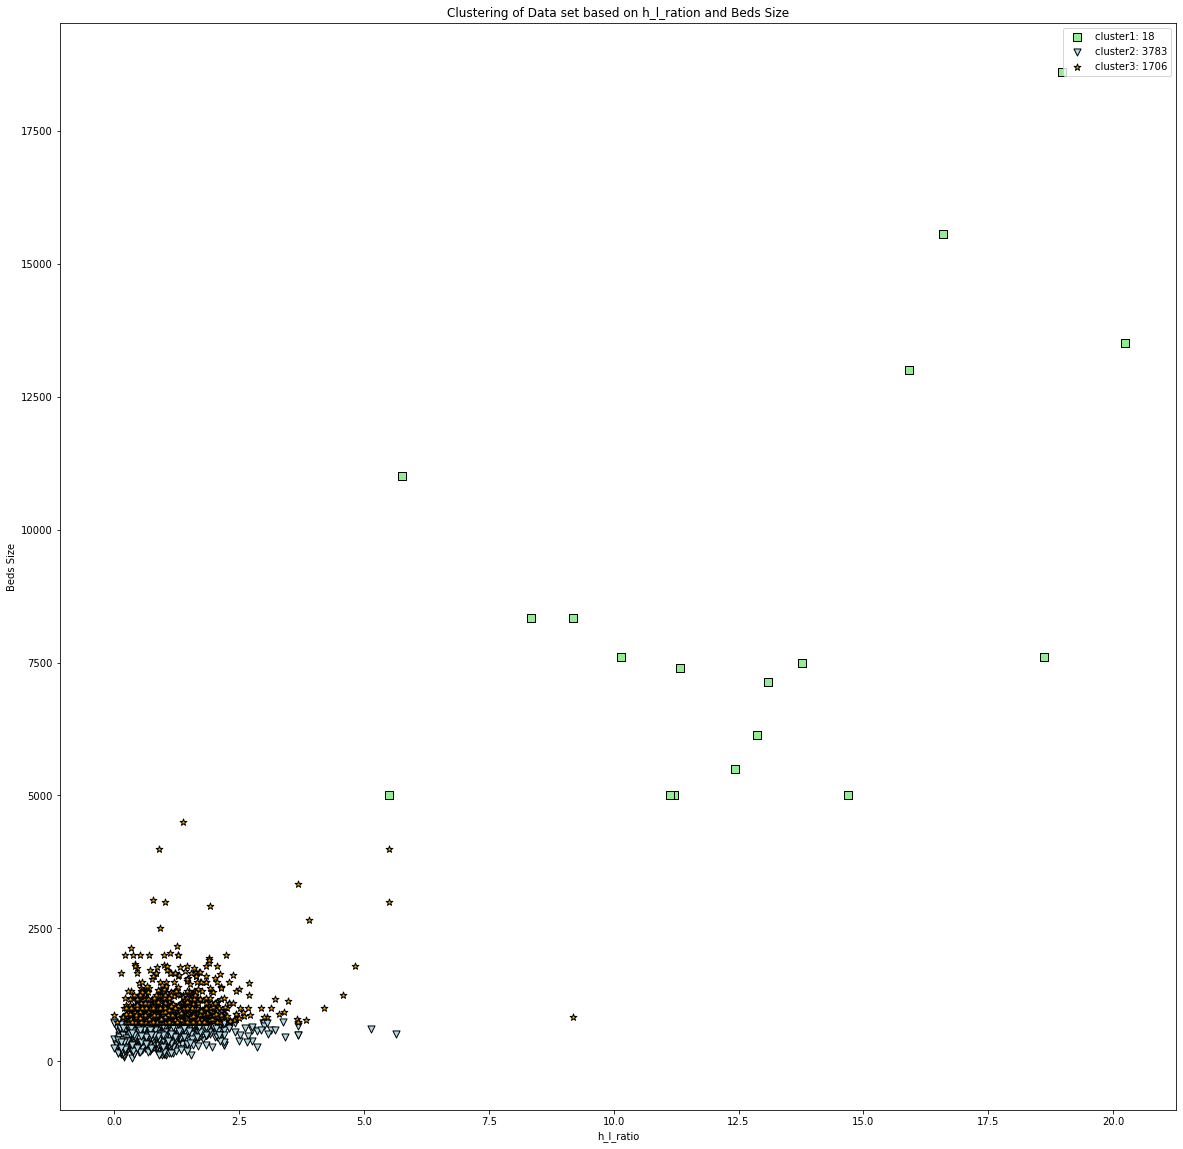

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_h_l_beds[y_km == 0]['h_l_ratio'],
    df_h_l_beds[y_km == 0]['Bed Size'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_h_l_beds[y_km == 1]['h_l_ratio'],
    df_h_l_beds[y_km == 1]['Bed Size'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_h_l_beds[y_km == 2]['h_l_ratio'],
    df_h_l_beds[y_km == 2]['Bed Size'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str(df_h_l_beds[y_km==0].shape[0]),
    'cluster2: ' + str(df_h_l_beds[y_km==1].shape[0]),
    'cluster3: ' + str(df_h_l_beds[y_km==2].shape[0])
          ])
ax.set_xlabel('h_l_ratio')
ax.set_ylabel('Beds Size')
ax.set_title('Clustering of Data set based on h_l_ration and Beds Size')

In [9]:
df['Bed Size'].describe()

count     5507.000000
mean       691.085713
std        576.200103
min         66.666667
25%        500.000000
50%        633.333333
75%        766.666667
max      18600.000000
Name: Bed Size, dtype: float64

In [10]:
df['h_l_ratio'].describe()

count    5507.000000
mean        1.040294
std         0.875743
min         0.000023
25%         0.627397
50%         0.972290
75%         1.285583
max        20.239501
Name: h_l_ratio, dtype: float64

Text(0.5, 1.0, 'Testing Model')

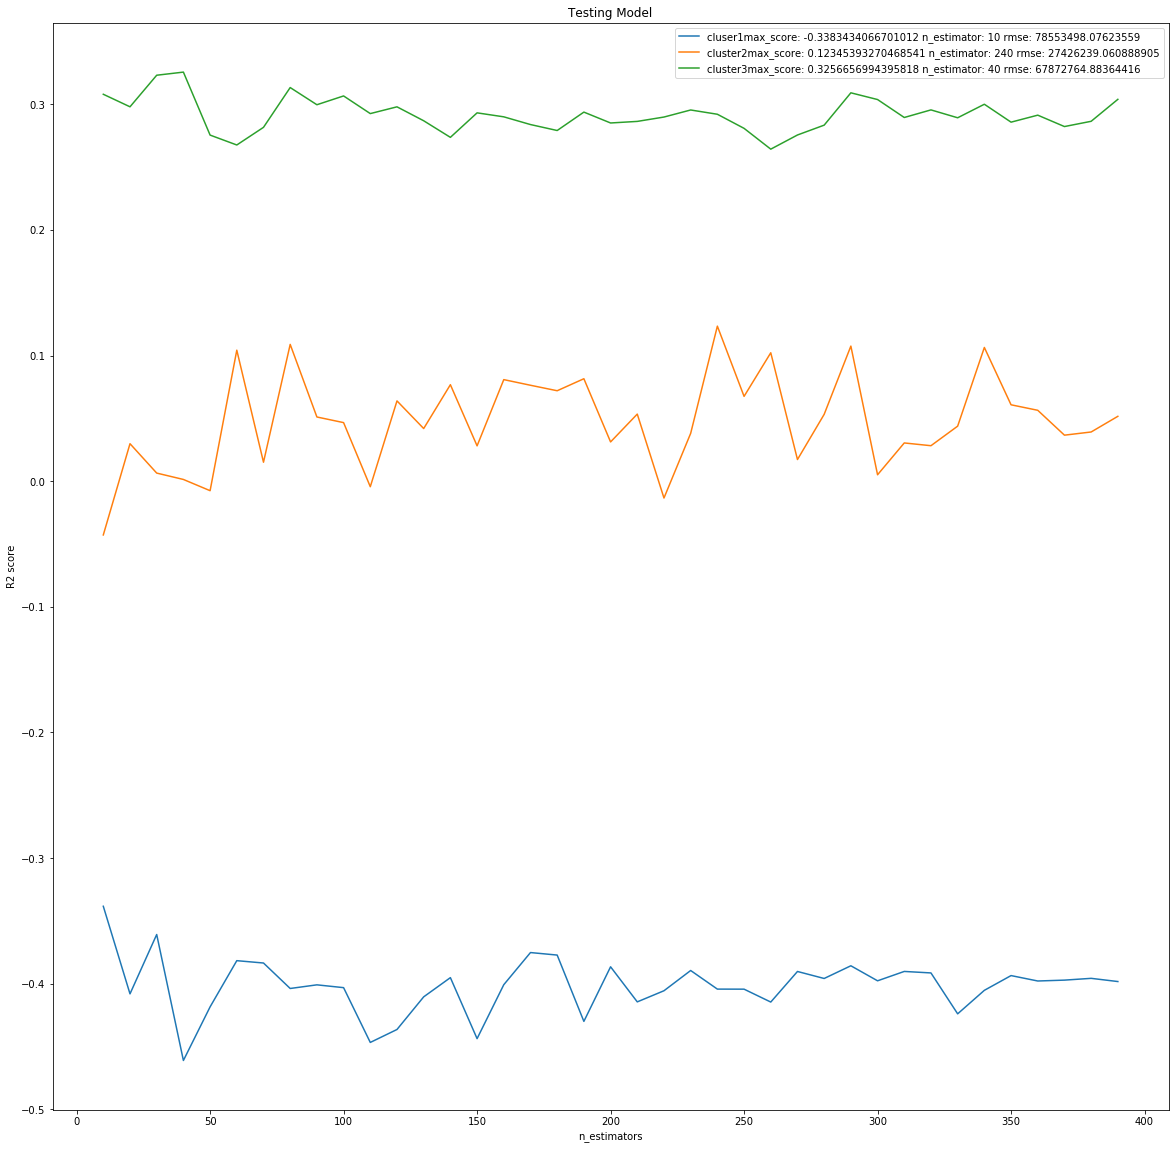

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2]),
    'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

from above plot we can notice the RMSE drop to 2crore

In [12]:
km = KMeans(
    n_clusters=2,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
df_h_l_beds = pd.concat([df['h_l_ratio'], df['Bed Size']], axis=1)
km.fit(df_h_l_beds)
y_km = km.predict(df_h_l_beds)

Text(0.5, 1.0, 'Clustering of Data set based on h_l_ration and Beds Size')

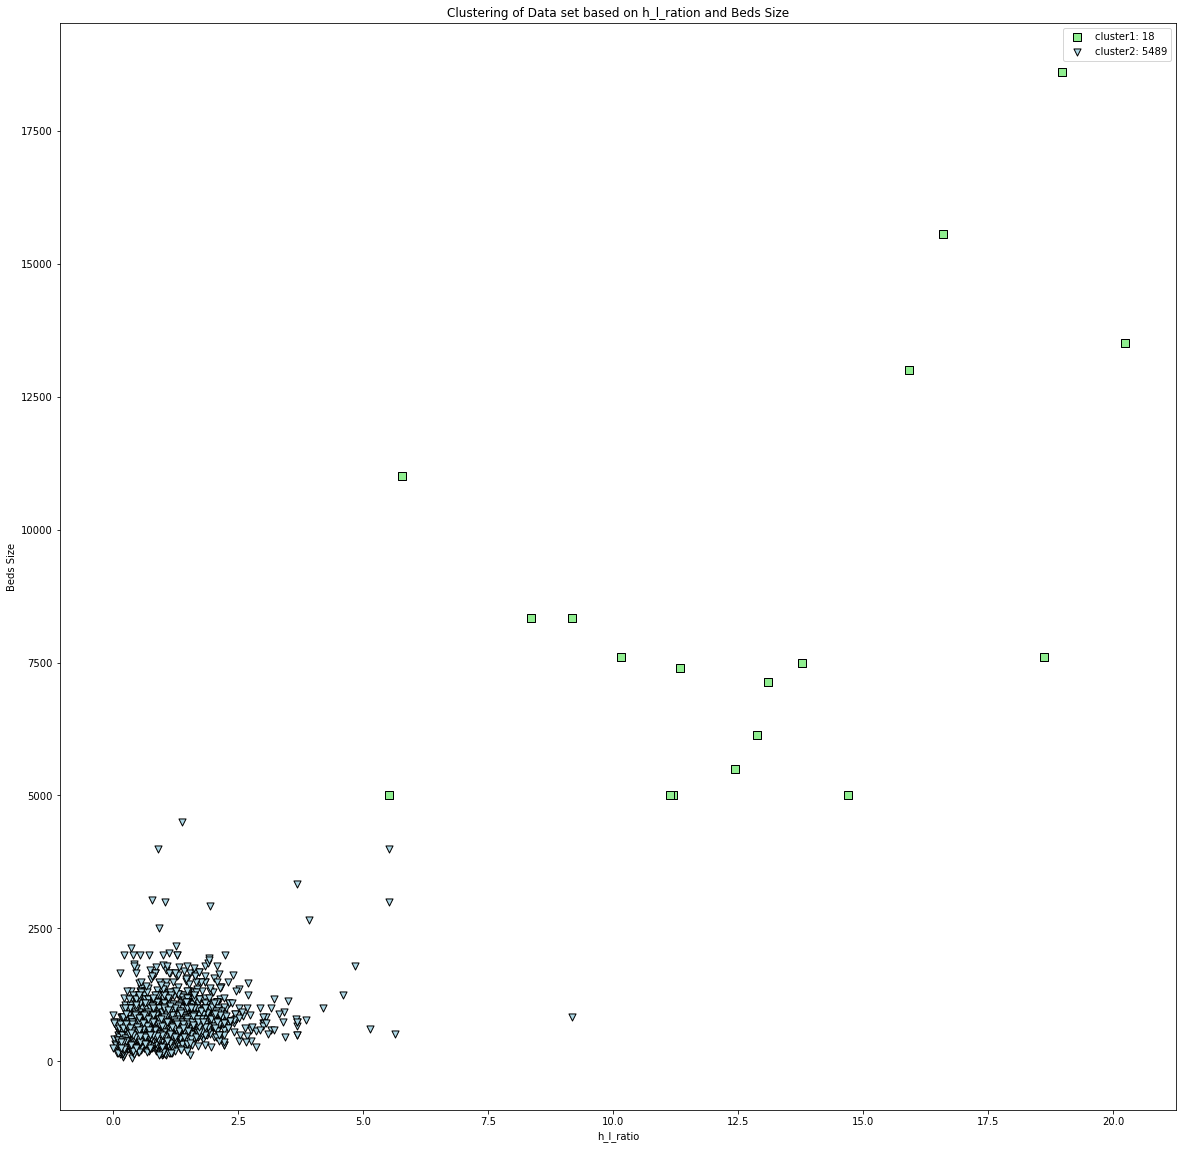

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_h_l_beds[y_km == 0]['h_l_ratio'],
    df_h_l_beds[y_km == 0]['Bed Size'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_h_l_beds[y_km == 1]['h_l_ratio'],
    df_h_l_beds[y_km == 1]['Bed Size'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

# ax.scatter(
#     df_h_l_beds[y_km == 2]['h_l_ratio'],
#     df_h_l_beds[y_km == 2]['Bed Size'],
#     s=50,
#     c='orange',
#     marker='*',
#     edgecolor='black',
#     label='cluster 1'
# )
ax.legend([
    'cluster1: ' + str(df_h_l_beds[y_km==0].shape[0]),
    'cluster2: ' + str(df_h_l_beds[y_km==1].shape[0])
#     'cluster3: ' + str(df_h_l_beds[y_km==2].shape[0])
          ])
ax.set_xlabel('h_l_ratio')
ax.set_ylabel('Beds Size')
ax.set_title('Clustering of Data set based on h_l_ration and Beds Size')

Text(0.5, 1.0, 'Testing Model')

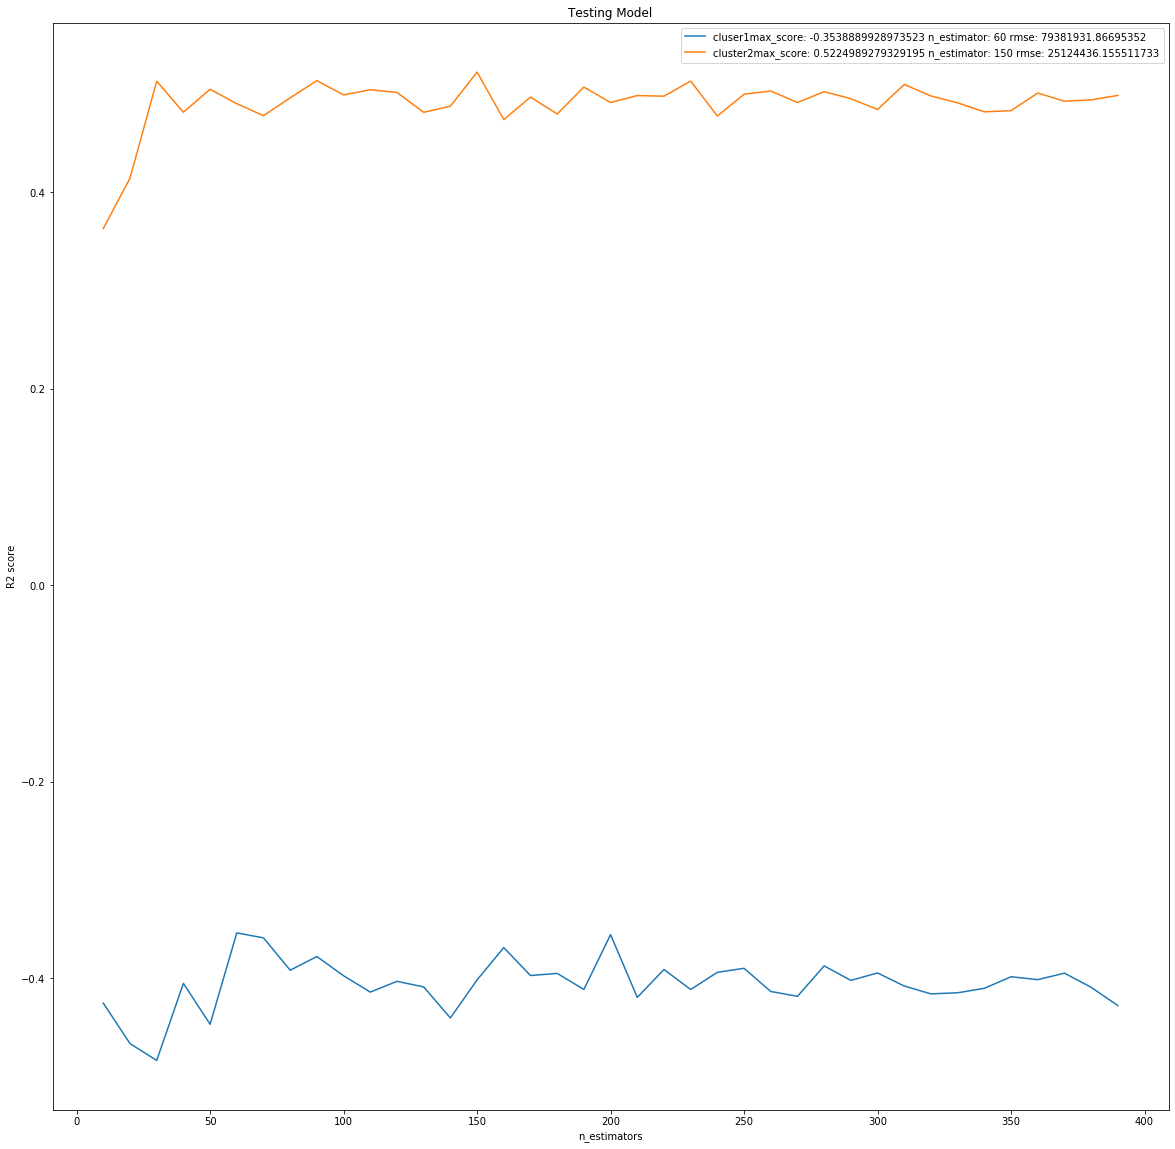

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(2):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
#     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

Now i can elimate the cluster 1 instances and cluster 2 RMSE about 2crore

In [15]:
df = df.drop(df[y_km ==0].index, axis=0)

In [16]:
df.shape

(5489, 9)

Trying clustering with h_l_ratio and land size

In [17]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
df_h_l_Land_size = pd.concat([df['h_l_ratio'], df['Land Size']], axis=1)
km.fit(df_h_l_Land_size)
y_km = km.predict(df_h_l_Land_size)

Text(0.5, 1.0, 'Clustering of Data set based on h_l_ration and Beds Size')

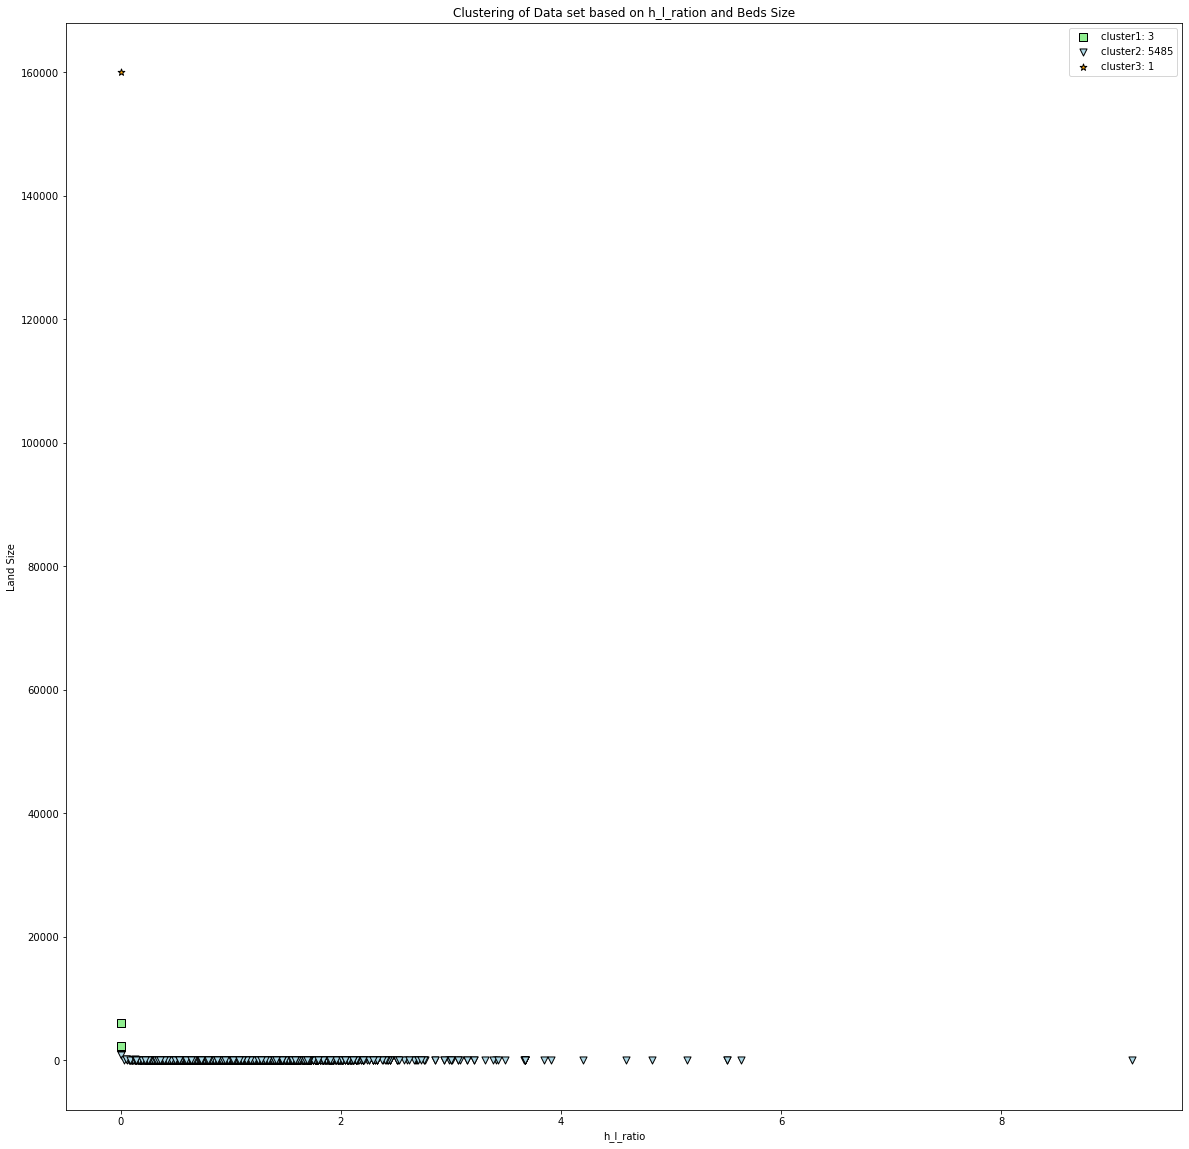

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_h_l_Land_size[y_km == 0]['h_l_ratio'],
    df_h_l_Land_size[y_km == 0]['Land Size'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_h_l_Land_size[y_km == 1]['h_l_ratio'],
    df_h_l_Land_size[y_km == 1]['Land Size'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_h_l_Land_size[y_km == 2]['h_l_ratio'],
    df_h_l_Land_size[y_km == 2]['Land Size'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str(df_h_l_Land_size[y_km==0].shape[0]),
    'cluster2: ' + str(df_h_l_Land_size[y_km==1].shape[0]),
    'cluster3: ' + str(df_h_l_Land_size[y_km==2].shape[0])
          ])
ax.set_xlabel('h_l_ratio')
ax.set_ylabel('Land Size')
ax.set_title('Clustering of Data set based on h_l_ration and Beds Size')

[(0.55605015315417, 90, 22069644.28617129)]


Text(0.5, 1.0, 'Testing Model')

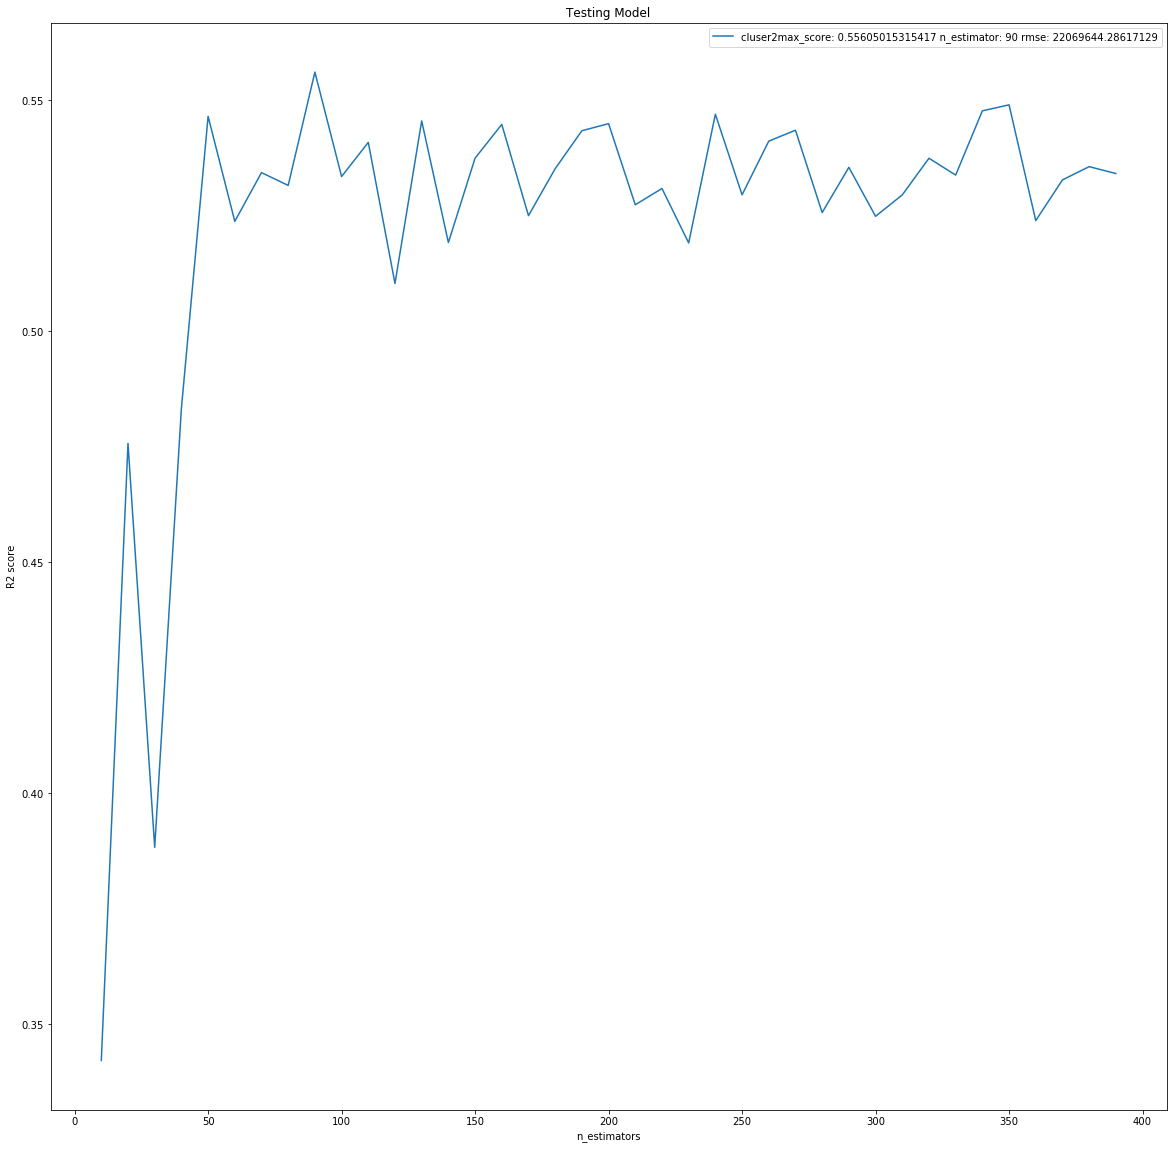

In [19]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in [1]:
    X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
print(max_scores_param)
ax.legend([
    'cluser2' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2])
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2]),
#     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

Investigating the cluster1 and cluster2

We can notice all above instances have huge lands, so we can drop them

In [20]:
df[y_km == 0]

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size
2056,2056,18,38000000,4,4,3500.0,6000.0,0.002143,875.000000
3235,3236,27,42250000,3,3,2200.0,2200.0,0.003673,733.333333
7296,7299,16,140000000,4,2,2900.0,2387.0,0.004462,725.000000


In [21]:
df = df.drop(df[y_km == 0].index, axis=0)

In [22]:
df[df['Land Size'].max() == df['Land Size']]

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size
4516,4518,6,16000000,4,2,1000.0,160000.0,0.000023,250.0


The above instance also has huge land size , so we can drop 

In [23]:
df = df.drop(df[df['Land Size'].max() == df['Land Size']].index, axis=0)

try with 2 cluster

In [24]:
km = KMeans(
    n_clusters=2,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
df_h_l_Land_size = pd.concat([df['h_l_ratio'], df['Land Size']], axis=1)
km.fit(df_h_l_Land_size)
y_km = km.predict(df_h_l_Land_size)

Text(0.5, 1.0, 'Clustering of Data set based on h_l_ration and Beds Size')

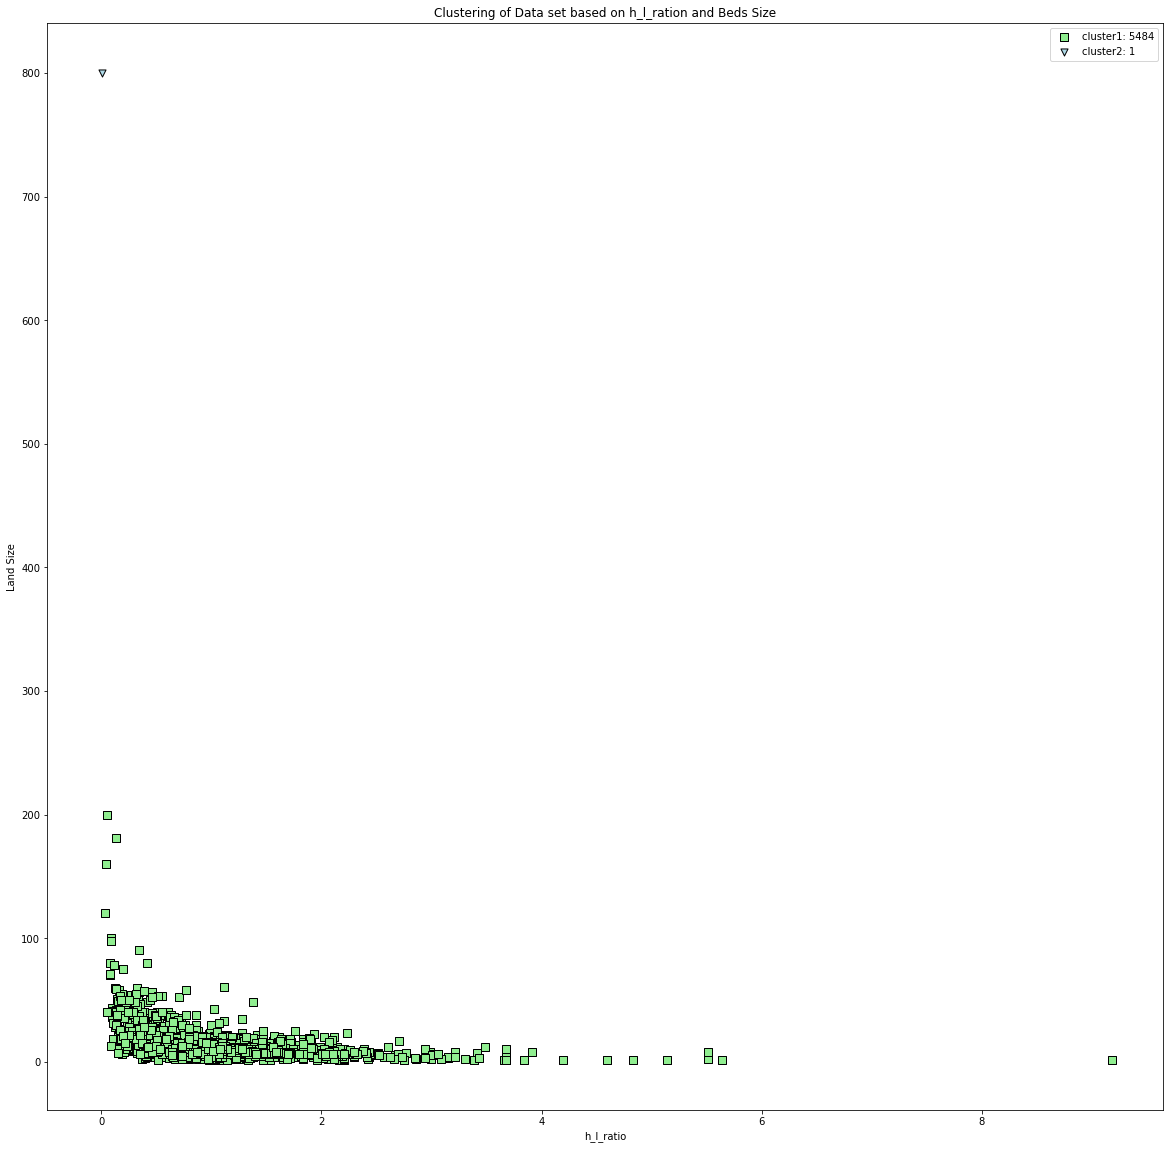

In [25]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_h_l_Land_size[y_km == 0]['h_l_ratio'],
    df_h_l_Land_size[y_km == 0]['Land Size'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_h_l_Land_size[y_km == 1]['h_l_ratio'],
    df_h_l_Land_size[y_km == 1]['Land Size'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

# ax.scatter(
#     df_h_l_Land_size[y_km == 2]['h_l_ratio'],
#     df_h_l_Land_size[y_km == 2]['Land Size'],
#     s=50,
#     c='orange',
#     marker='*',
#     edgecolor='black',
#     label='cluster 1'
# )
ax.legend([
    'cluster1: ' + str(df_h_l_Land_size[y_km==0].shape[0]),
    'cluster2: ' + str(df_h_l_Land_size[y_km==1].shape[0])
#     'cluster3: ' + str(df_h_l_Land_size[y_km==2].shape[0])
          ])
ax.set_xlabel('h_l_ratio')
ax.set_ylabel('Land Size')
ax.set_title('Clustering of Data set based on h_l_ration and Beds Size')

Text(0.5, 1.0, 'Testing Model')

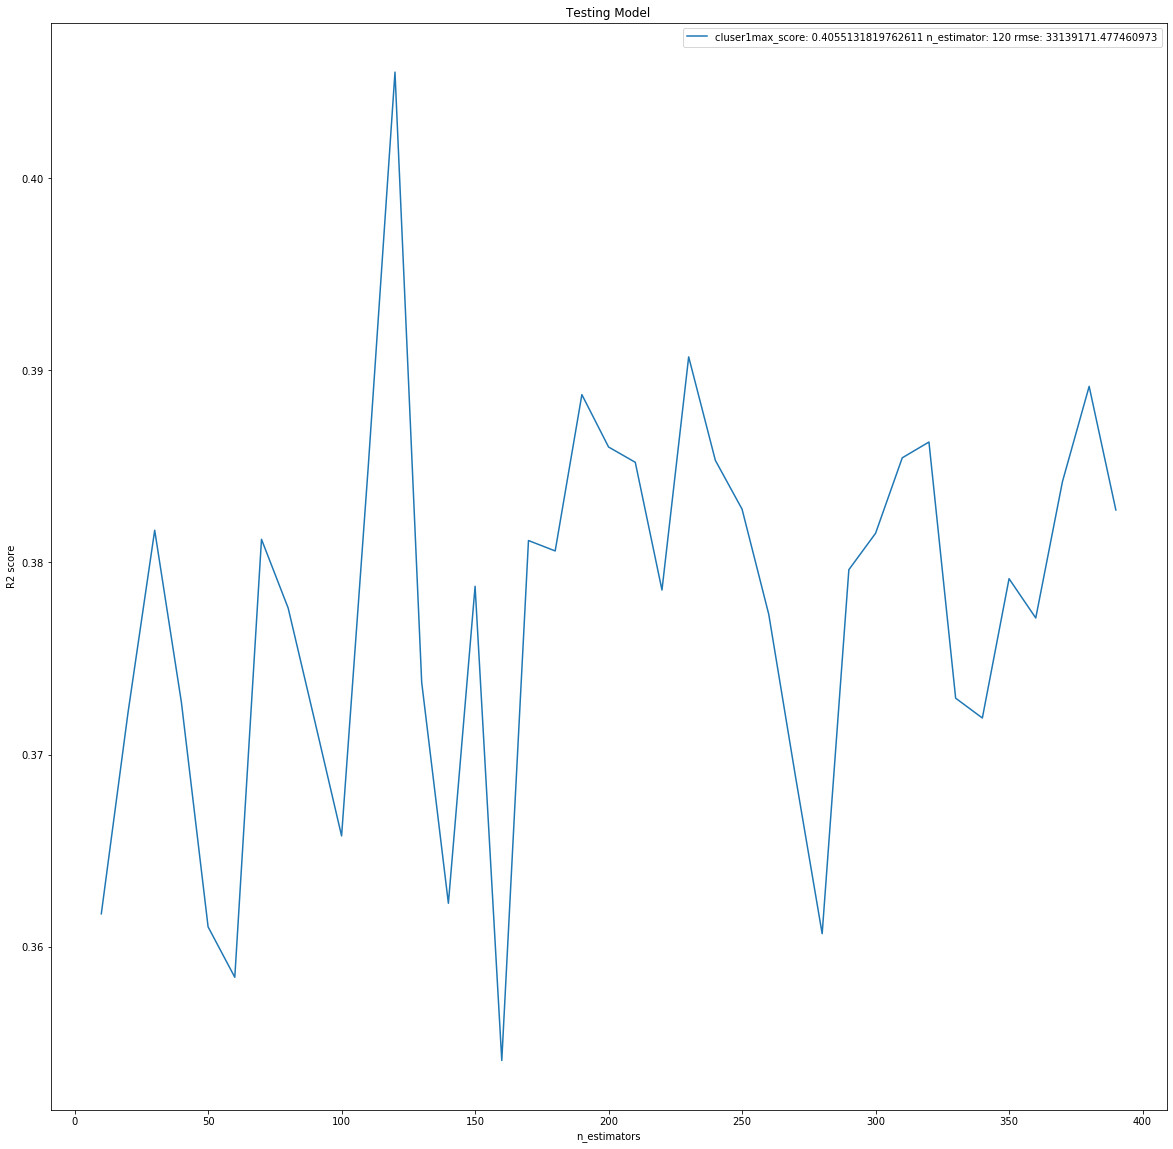

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in [0]:
    X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2])
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
#     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h1>Filter only single story houses based on h_l_ratio</h1>

In [27]:
df_single_story = df[df['h_l_ratio'] < 1.0]

In [ ]:
df_single_story.head()

<h1> the correlation matrix for the single story houses</h1>

Text(0.5, 1, 'Corretion Matrix for Single Story house')

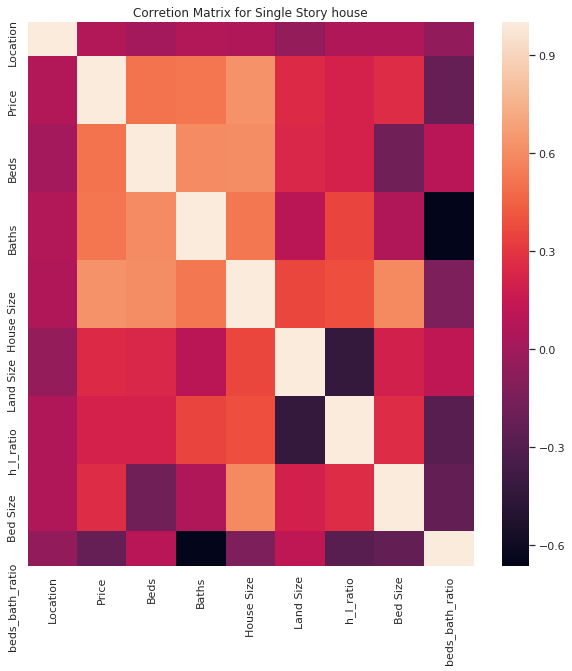

In [119]:
fig,axes = plt.subplots( figsize=(10,10))
sns.heatmap(df_single_story.corr())
axes.set_title('Corretion Matrix for Single Story house')

<h1>Building  Models for Single Story Houses </h1>

Text(0.5, 1.0, 'Testing Model')

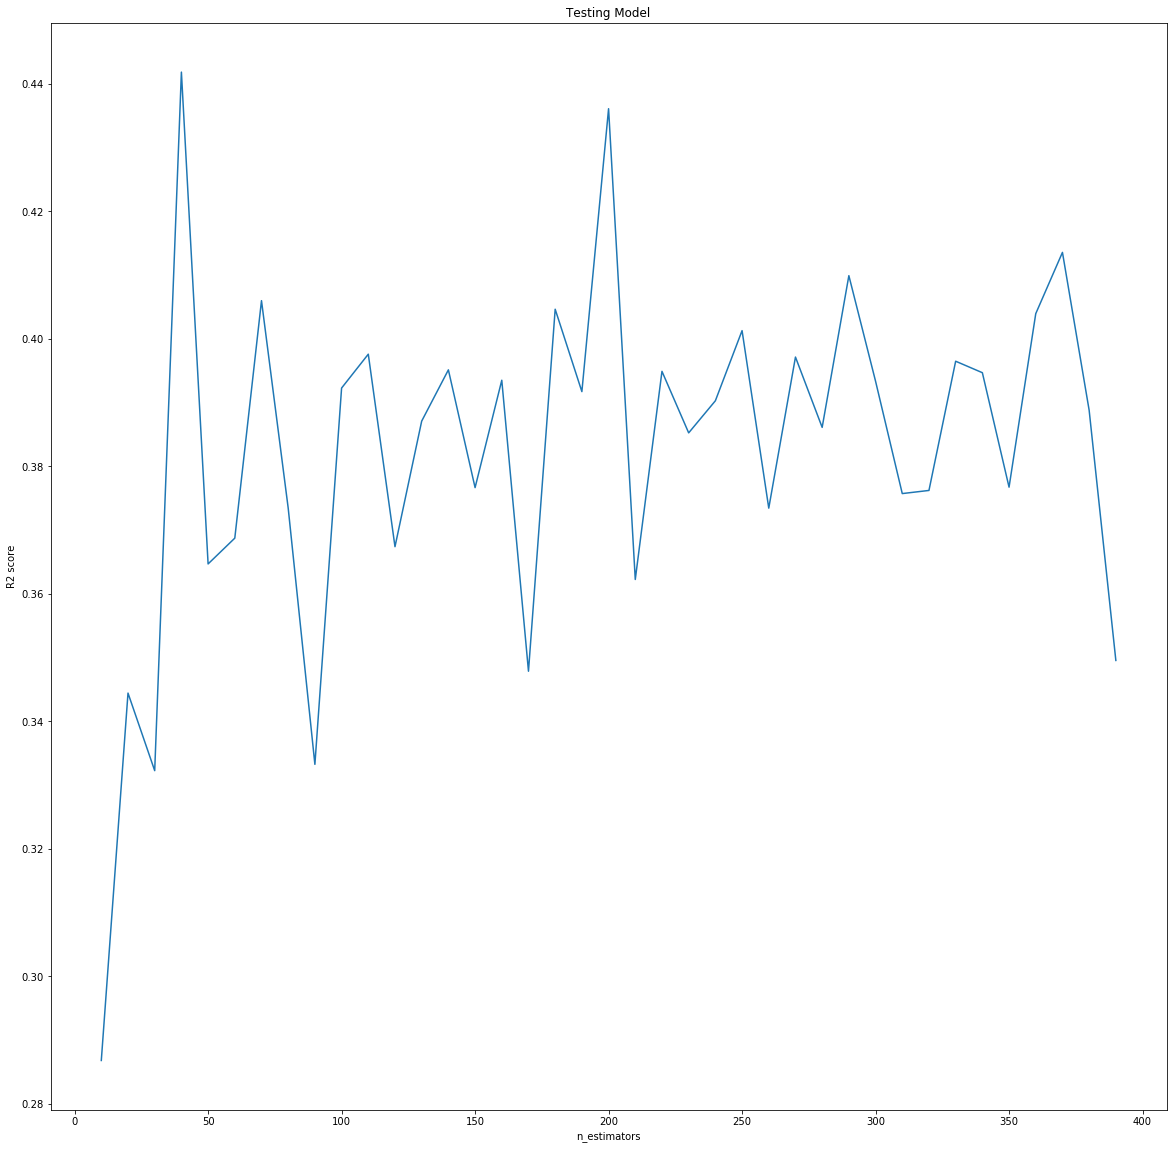

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []

X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=['Unnamed: 0', 'Price'],axis=1),
    df_single_story['Price'],
    test_size=0.25,
    random_state=42
)
estimators = np.arange(10, 400, 10)
scores = []
rmse = 0.0
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
    scores.append(model.score(X_test, Y_test))
max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
ax.plot(estimators, scores)
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h2>No Improvement

In [32]:
df_single_story.describe()

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size
count,2869.000000,2869.000000,2.869000e+03,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000
mean,3611.274312,23.609620,2.830004e+07,3.578599,2.478913,2088.866595,13.680488,0.639618,589.079596
std,2205.068062,11.683243,4.776265e+07,1.285517,1.206383,1099.898349,18.068178,0.213666,240.833019
min,0.000000,0.000000,8.500000e+04,1.000000,1.000000,174.240000,1.000000,0.003903,66.666667
25%,1707.000000,20.000000,1.000000e+07,3.000000,2.000000,1350.000000,8.300000,0.489746,448.750000
50%,3509.000000,26.000000,1.500000e+07,3.000000,2.000000,1800.000000,10.280000,0.642792,533.333333
75%,5486.000000,35.000000,2.900000e+07,4.000000,3.000000,2500.000000,15.000000,0.821045,675.000000
max,7609.000000,39.000000,1.300000e+09,10.000000,10.000000,12150.000000,800.000000,0.999998,4000.000000


In [33]:
from scipy.stats import norm
from scipy import stats

<h1>The normality of features of  single story houses

<h2>House Size

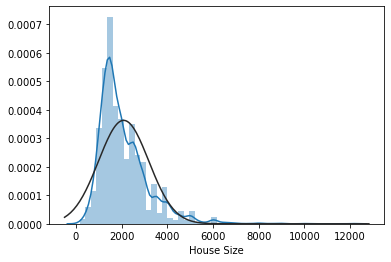

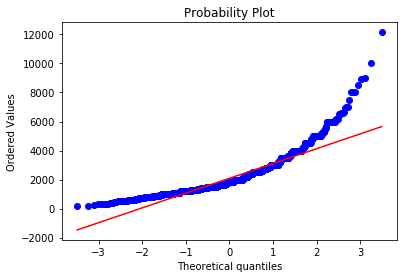

In [34]:

sns.distplot(df_single_story['House Size'] ,fit=norm)
fig = plt.figure()
res = stats.probplot(df_single_story['House Size'], plot =plt)

<h2>Trying Log Transformation

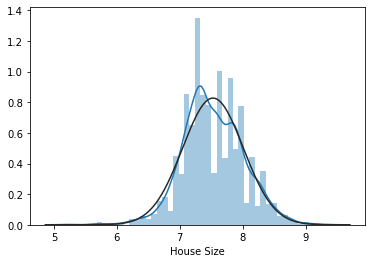

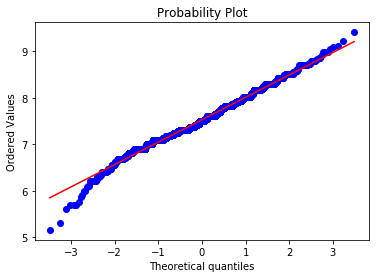

In [35]:

sns.distplot(np.log(df_single_story['House Size']) ,fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(df_single_story['House Size']), plot =plt)

<h2>Build Model with log trasformed House Size for single Story houses

In [36]:
df_test_log_trans = df_single_story.copy()

In [37]:
df_test_log_trans['House Size'] = df_test_log_trans['House Size'].apply(lambda x: np.log(x))

Text(0.5, 1.0, 'Testing Model')

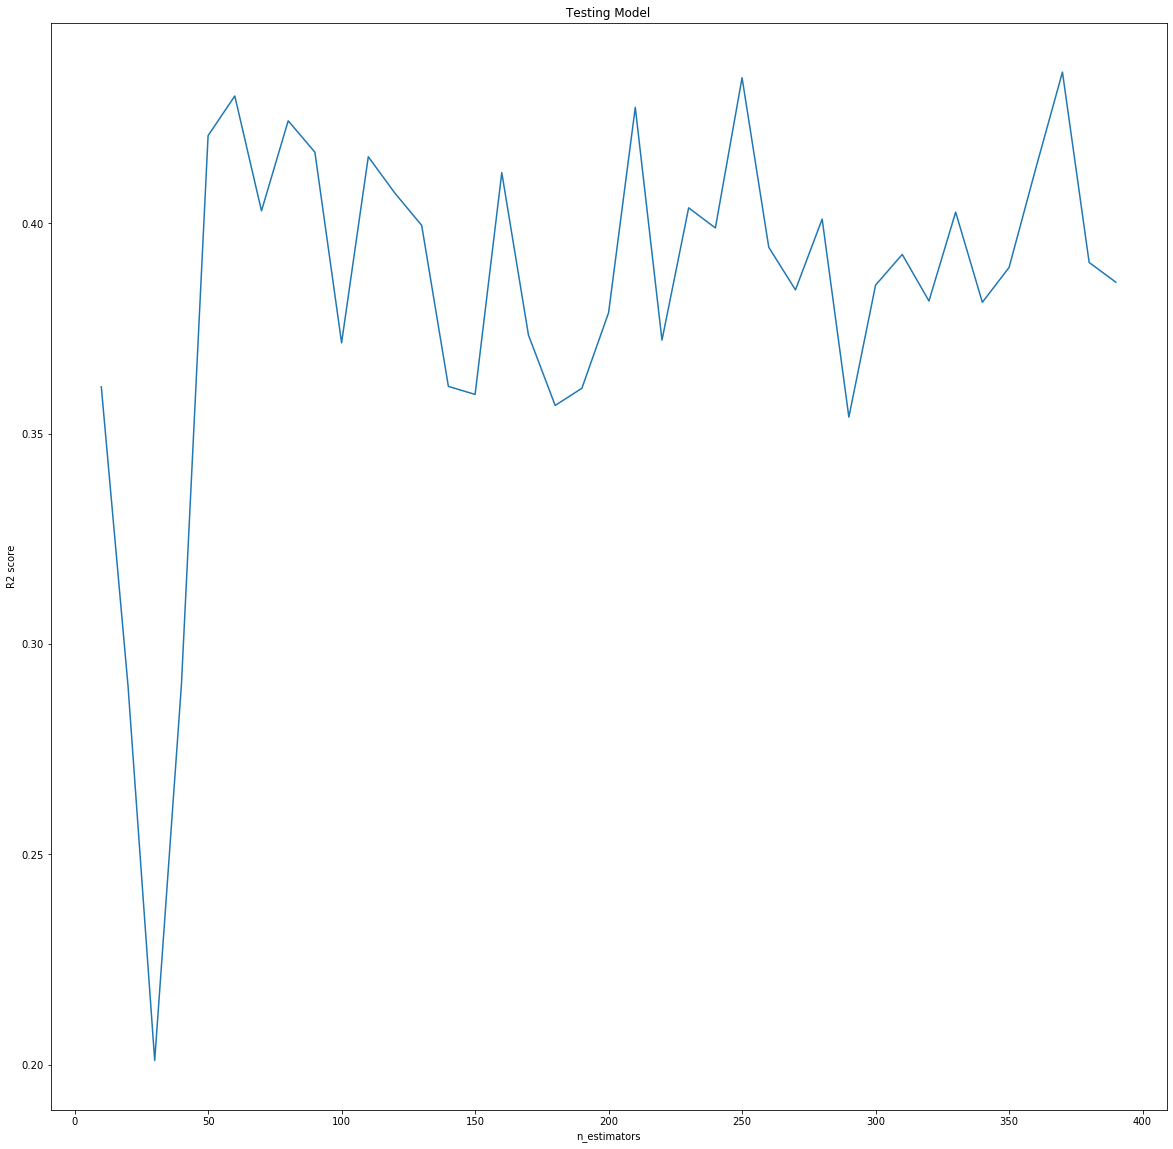

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test_log_trans.drop(columns=['Unnamed: 0', 'Price'],axis=1),
    df_test_log_trans['Price'],
    test_size=0.25,
    random_state=42
)
estimators = np.arange(10, 400, 10)
scores = []
rmse = 0.0
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
    scores.append(model.score(X_test, Y_test))
max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
ax.plot(estimators, scores)
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h2>NO improvement in R2 score, 
Try clustering Single Story Houses

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max_scaler = MinMaxScaler()
# min_max_scaler.fit_transform(df_single_story['Baths'].values)

In [41]:
df_single_story = df_single_story.dropna()

<h1>clustering with House size and Beds

In [43]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

df_house_size_baths = pd.concat([df_single_story['House Size'], df_single_story['Beds']/ df_single_story['Beds'].max()], axis=1)
km.fit(df_house_size_baths)
y_km = km.predict(df_house_size_baths)

Text(0.5, 1.0, 'Clustering of Data set based on House Size and Beds')

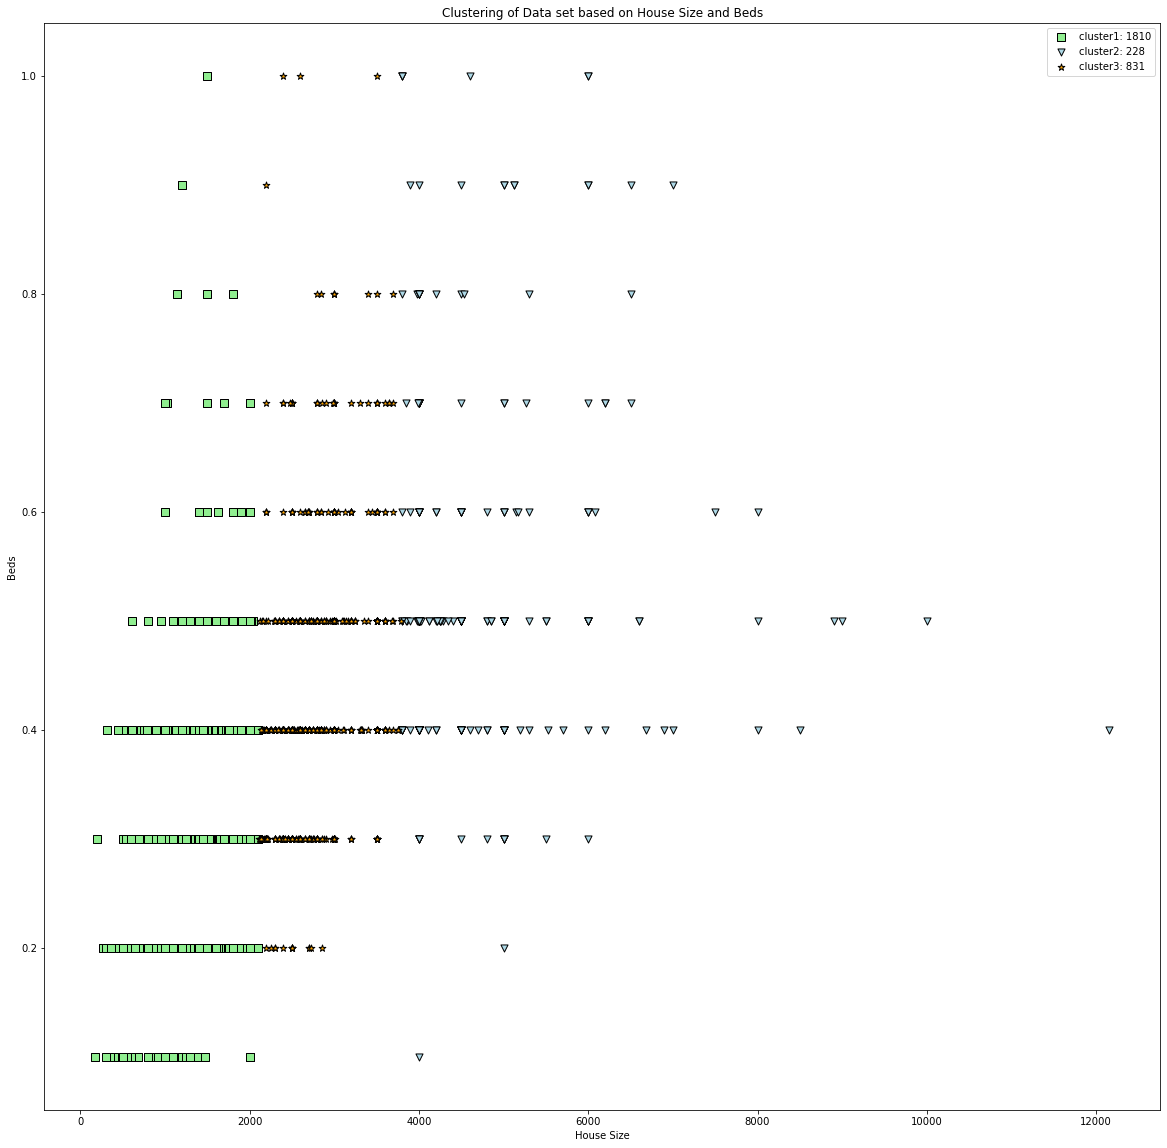

In [44]:


# km = KMeans(
#     n_clusters=3,
#     init= 'random',
#     n_init=10,
#     max_iter=300,
#     tol=1e-04,
#     random_state=0
# )
# df_h_l_Land_size = pd.concat([df['House Size'], df['Baths']], axis=1)
# km.fit(df_h_l_Land_size)
# y_km = km.predict(df_h_l_Land_size)


fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_house_size_baths[y_km == 0]['House Size'],
    df_house_size_baths[y_km == 0]['Beds'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
   df_house_size_baths[y_km == 1]['House Size'],
    df_house_size_baths[y_km == 1]['Beds'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
   df_house_size_baths[y_km == 2]['House Size'],
    df_house_size_baths[y_km == 2]['Beds'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str(df_house_size_baths[y_km==0].shape[0]),
    'cluster2: ' + str(df_house_size_baths[y_km==1].shape[0]),
    'cluster3: ' + str(df_house_size_baths[y_km==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('Beds')
ax.set_title('Clustering of Data set based on House Size and Beds')

<h1>Testing Clusters by building models

[(0.2565823956608071, 40, 19855543.21912518), (0.20301429361688095, 60, 157194011.75598577), (0.4844330403699485, 20, 28195576.296958454)]


Text(0.5, 1.0, 'Testing Model')

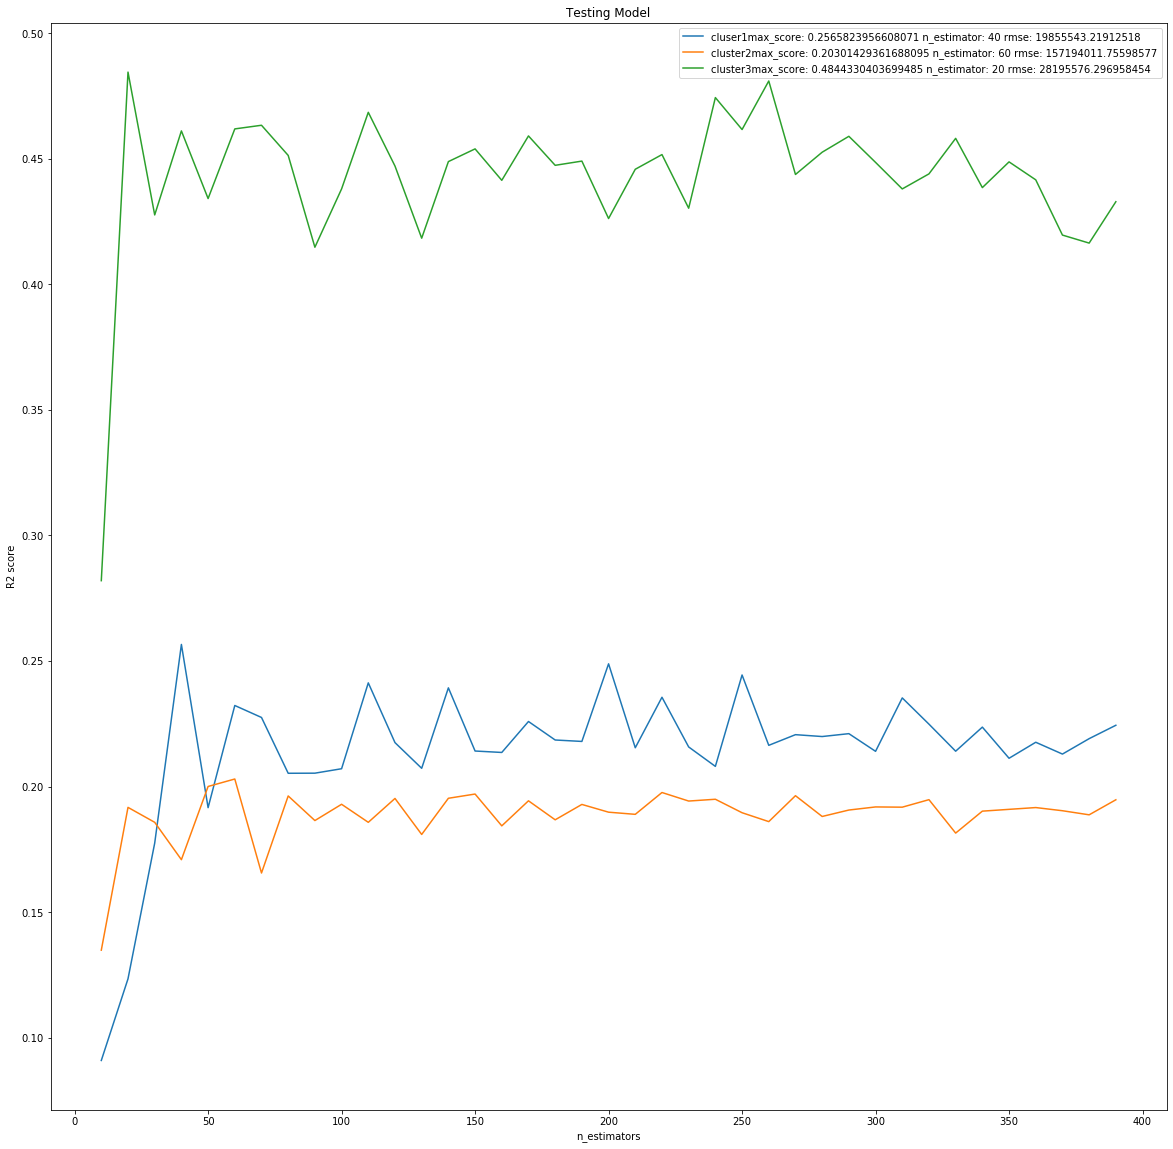

In [45]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df_single_story['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
print(max_scores_param)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2]),
    'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h1>No clear results
<h1> NO improvement

<h1>Try 2 clusters

In [46]:
km = KMeans(
    n_clusters=2,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

df_house_size_baths = pd.concat([df_single_story['House Size'], df_single_story['Beds']/ df_single_story['Beds'].max()], axis=1)
km.fit(df_house_size_baths)
y_km = km.predict(df_house_size_baths)

Text(0.5, 1.0, 'Clustering of Data set based on House Size and Beds')

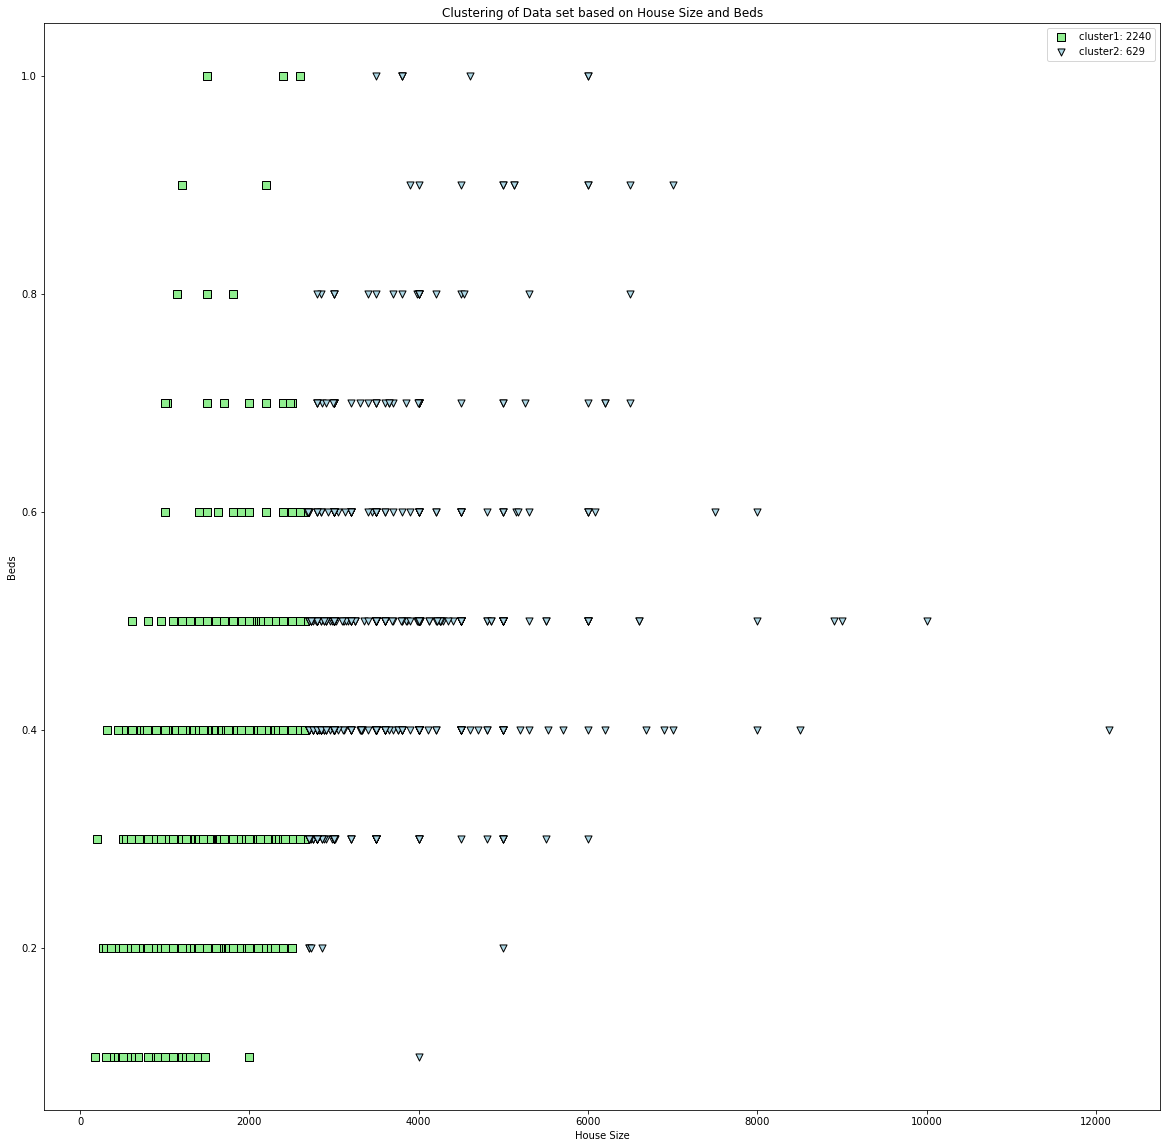

In [47]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_house_size_baths[y_km == 0]['House Size'],
    df_house_size_baths[y_km == 0]['Beds'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
   df_house_size_baths[y_km == 1]['House Size'],
    df_house_size_baths[y_km == 1]['Beds'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

# ax.scatter(
#    df_house_size_baths[y_km == 2]['House Size'],
#     df_house_size_baths[y_km == 2]['Beds'],
#     s=50,
#     c='orange',
#     marker='*',
#     edgecolor='black',
#     label='cluster 1'
# )
ax.legend([
    'cluster1: ' + str(df_house_size_baths[y_km==0].shape[0]),
    'cluster2: ' + str(df_house_size_baths[y_km==1].shape[0])
#     'cluster3: ' + str(df_house_size_baths[y_km==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('Beds')
ax.set_title('Clustering of Data set based on House Size and Beds')

[(0.2718803056799106, 30, 22268553.5991), (0.4063855728170115, 70, 48315461.81154865)]


Text(0.5, 1.0, 'Testing Model')

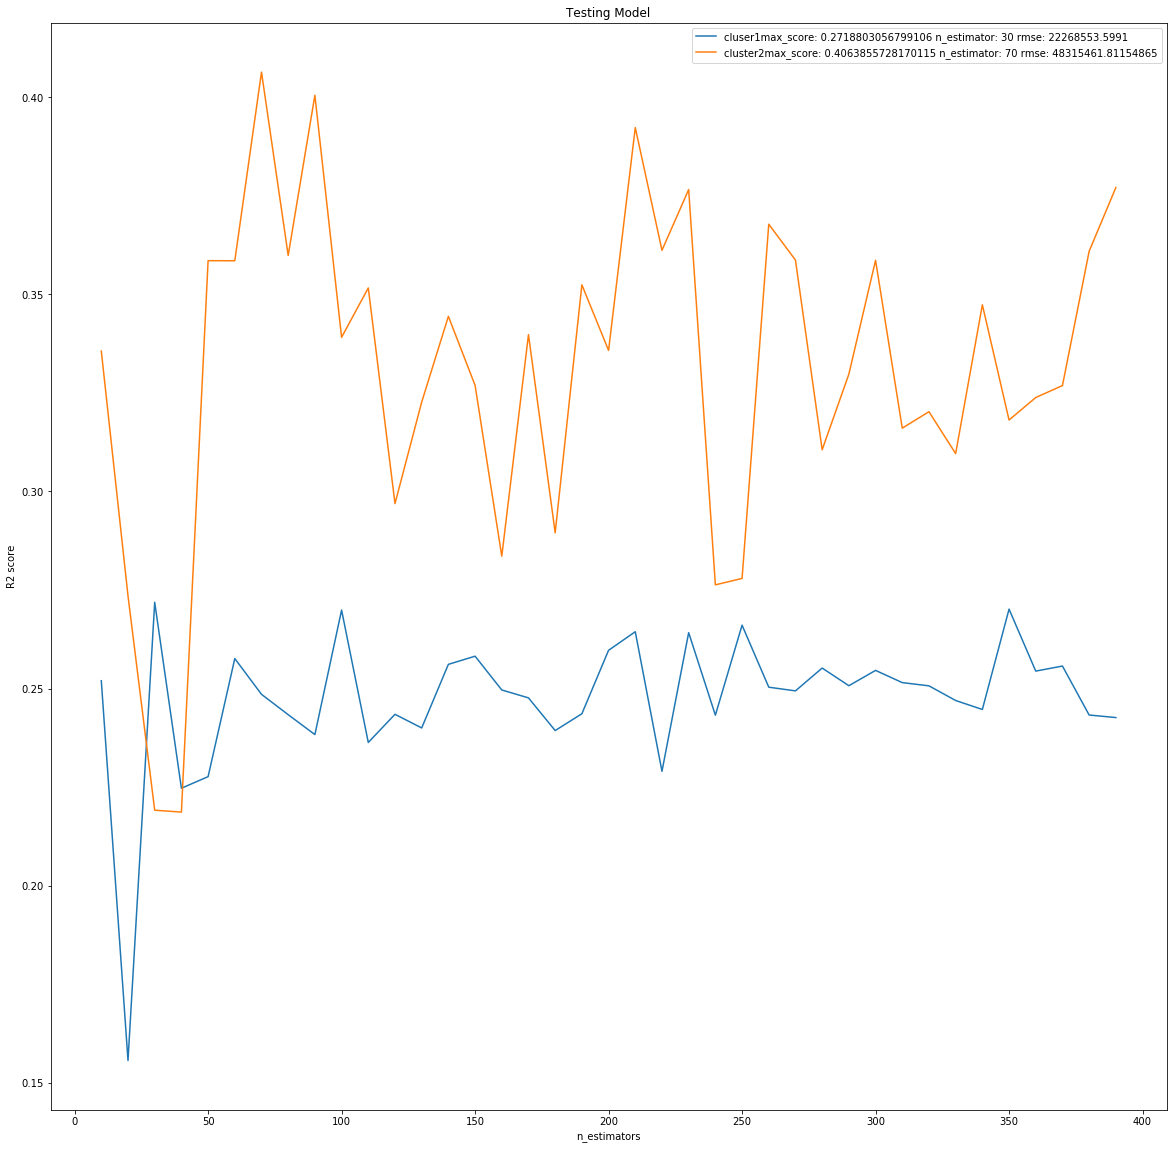

In [48]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(2):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df_single_story['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
print(max_scores_param)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
#     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h1>NO improvement

<h2>Try clustering with House Size and Baths

In [49]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

df_house_size_baths = pd.concat([df_single_story['House Size'], df_single_story['Baths']/ df_single_story['Baths'].max()], axis=1)
km.fit(df_house_size_baths)
y_km = km.predict(df_house_size_baths)

Text(0.5, 1.0, 'Clustering of Data set based on House Size and Baths')

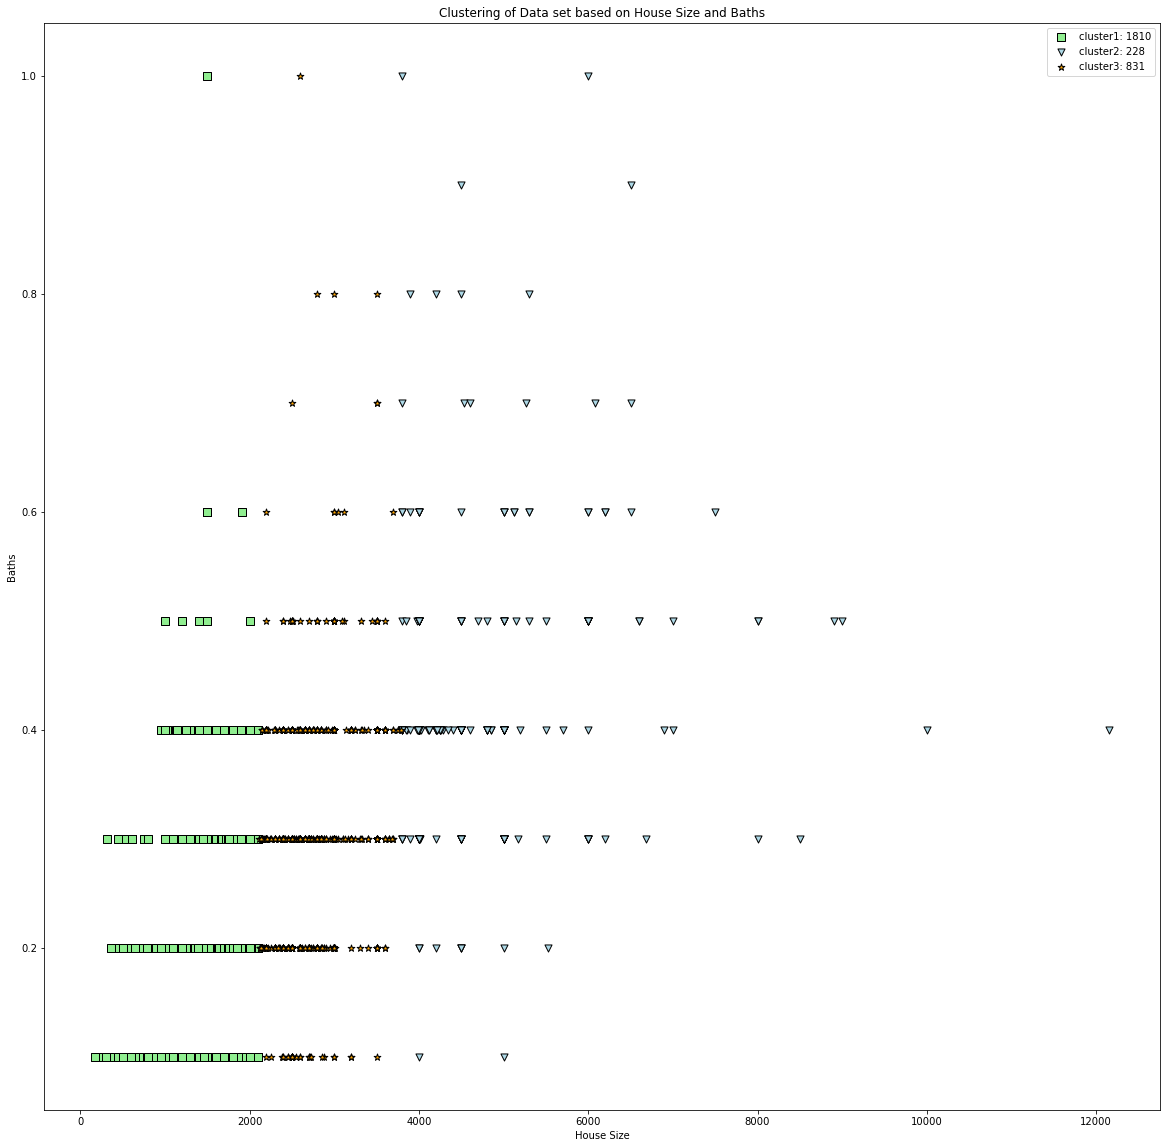

In [50]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_house_size_baths[y_km == 0]['House Size'],
    df_house_size_baths[y_km == 0]['Baths'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
   df_house_size_baths[y_km == 1]['House Size'],
    df_house_size_baths[y_km == 1]['Baths'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
   df_house_size_baths[y_km == 2]['House Size'],
    df_house_size_baths[y_km == 2]['Baths'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str(df_house_size_baths[y_km==0].shape[0]),
    'cluster2: ' + str(df_house_size_baths[y_km==1].shape[0]),
    'cluster3: ' + str(df_house_size_baths[y_km==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('Baths')
ax.set_title('Clustering of Data set based on House Size and Baths')

<h1>try clustering with Beds/Baths ratio

In [51]:
df_single_story['beds_bath_ratio'] = df_single_story['Beds']/df_single_story['Baths']

In [52]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

df_house_size_bed_bath_ratio = pd.concat([df_single_story['House Size'],df_single_story['beds_bath_ratio']], axis=1)
km.fit(df_house_size_bed_bath_ratio)
y_km = km.predict(df_house_size_bed_bath_ratio)

Text(0.5, 1.0, 'Clustering of Data set based on House Size and beds_bath_ratio')

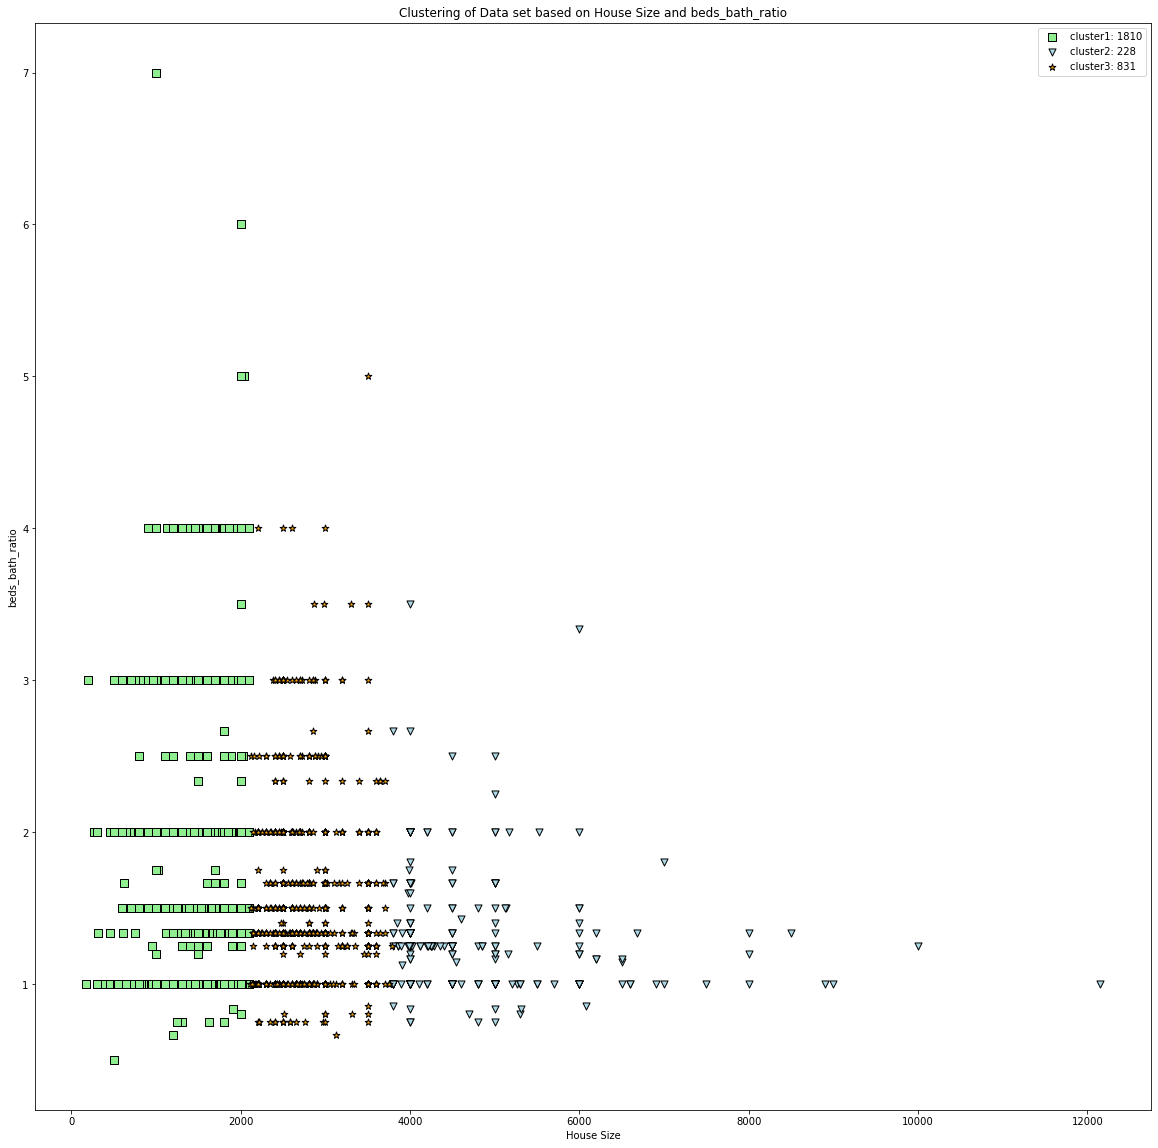

In [53]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_house_size_bed_bath_ratio[y_km == 0]['House Size'],
    df_house_size_bed_bath_ratio[y_km == 0]['beds_bath_ratio'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_house_size_bed_bath_ratio[y_km == 1]['House Size'],
    df_house_size_bed_bath_ratio[y_km == 1]['beds_bath_ratio'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_house_size_bed_bath_ratio[y_km == 2]['House Size'],
    df_house_size_bed_bath_ratio[y_km == 2]['beds_bath_ratio'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str(df_house_size_bed_bath_ratio[y_km==0].shape[0]),
    'cluster2: ' + str(df_house_size_bed_bath_ratio[y_km==1].shape[0]),
    'cluster3: ' + str(df_house_size_bed_bath_ratio[y_km==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('beds_bath_ratio')
ax.set_title('Clustering of Data set based on House Size and beds_bath_ratio')

[(0.23891307516342508, 290, 20050250.951877914), (0.19756845539086118, 30, 159184290.68442568), (0.46271227533846526, 50, 28592692.754737645)]


Text(0.5, 1.0, 'Testing Model')

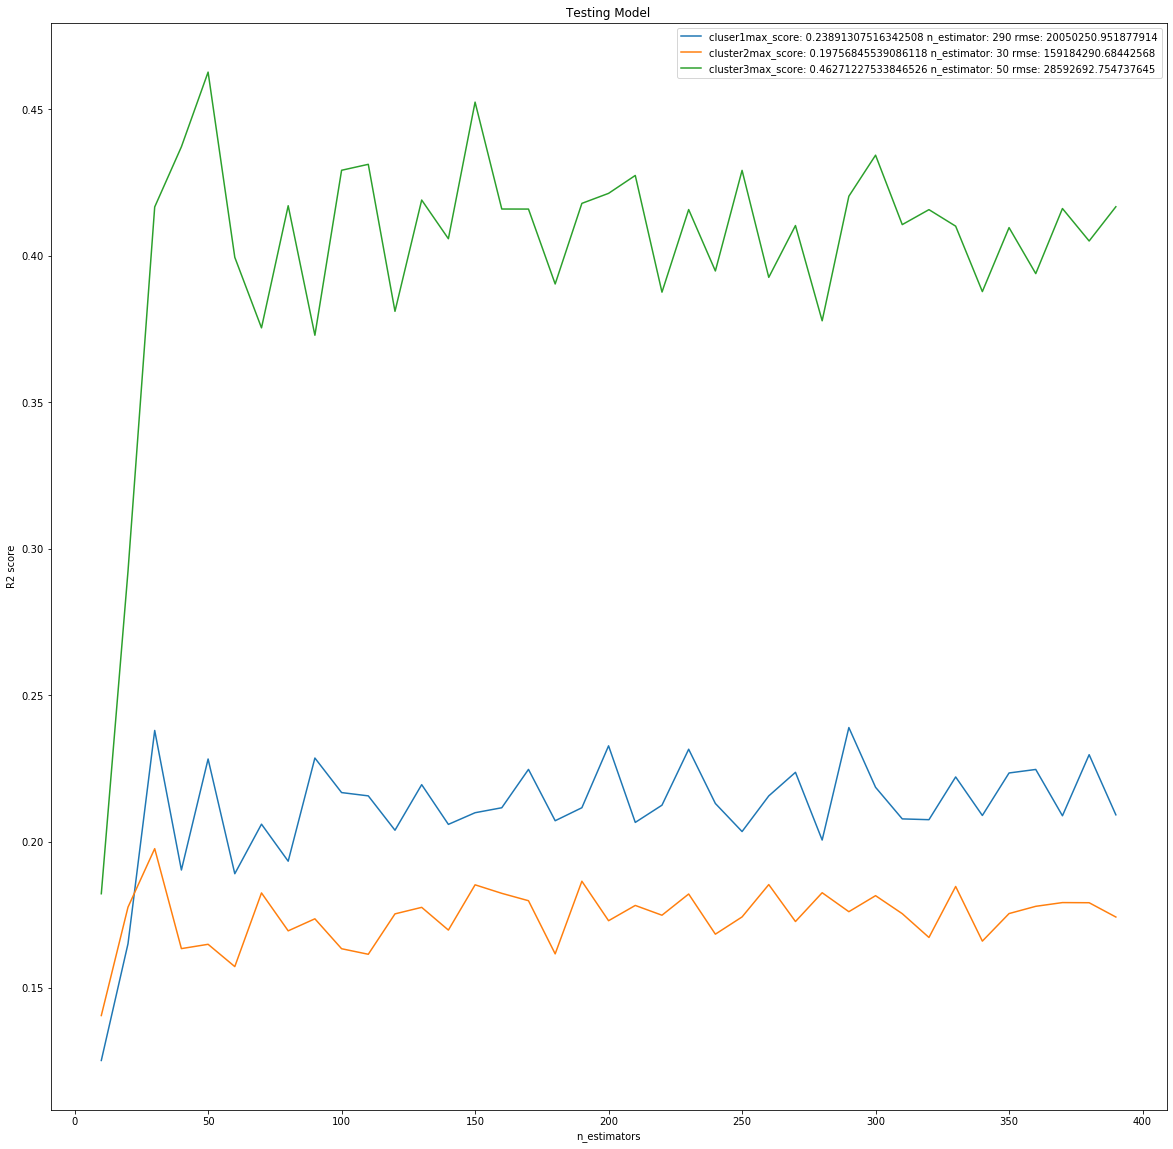

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df_single_story['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
print(max_scores_param)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2]),
    'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h1>NO improvement


<h1>see the distribution of land size

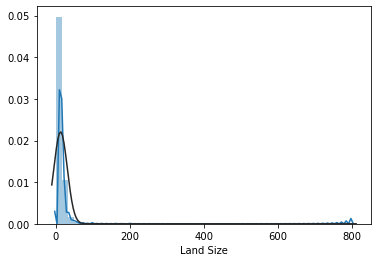

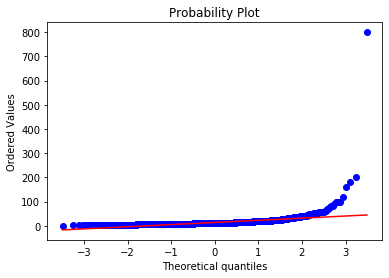

In [55]:
sns.distplot(df_single_story['Land Size'] ,fit=norm)
fig = plt.figure()
res = stats.probplot(df_single_story['Land Size'], plot =plt)

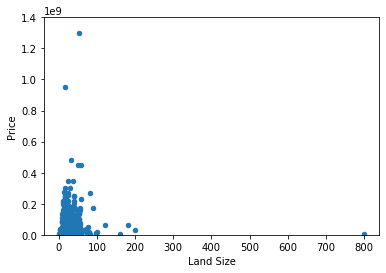

In [56]:
var = 'Land Size'
data = pd.concat([df_single_story['Price'], df_single_story[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

<h1>drop 3 instance those  didn't follow crowds

In [57]:
df_single_story = df_single_story.drop(df_single_story[df_single_story['Price'] > 0.8e9].index, axis=0)
df_single_story = df_single_story.drop(df_single_story[df_single_story['Land Size'] > 300].index, axis=0)

<h1>try log transformation

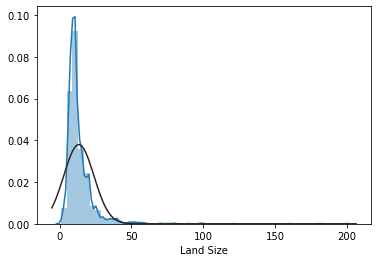

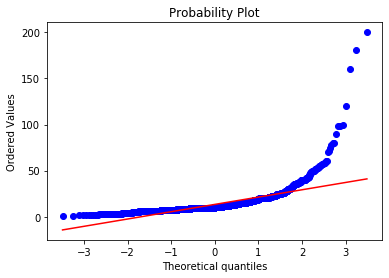

In [58]:
sns.distplot(df_single_story['Land Size'] ,fit=norm)
fig = plt.figure()
res = stats.probplot(df_single_story['Land Size'], plot =plt)

<h1>It doesn't fit Normal Distribution

In [59]:
df_single_story[df_single_story['Land Size'] > 50.0].shape

(32, 10)

<h2>There are only 32 instances(single story)  having land size above 50.0 Perches

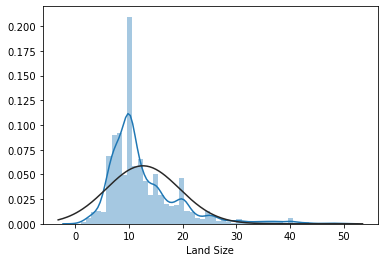

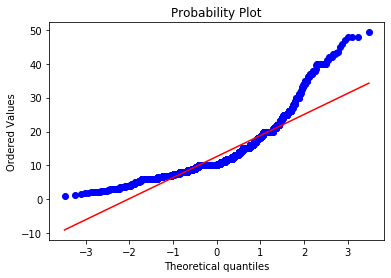

In [60]:
sns.distplot(df_single_story[df_single_story['Land Size'] < 50.0]['Land Size'] ,fit=norm)
fig = plt.figure()
res = stats.probplot(df_single_story[df_single_story['Land Size'] < 50.0]['Land Size'], plot =plt)

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


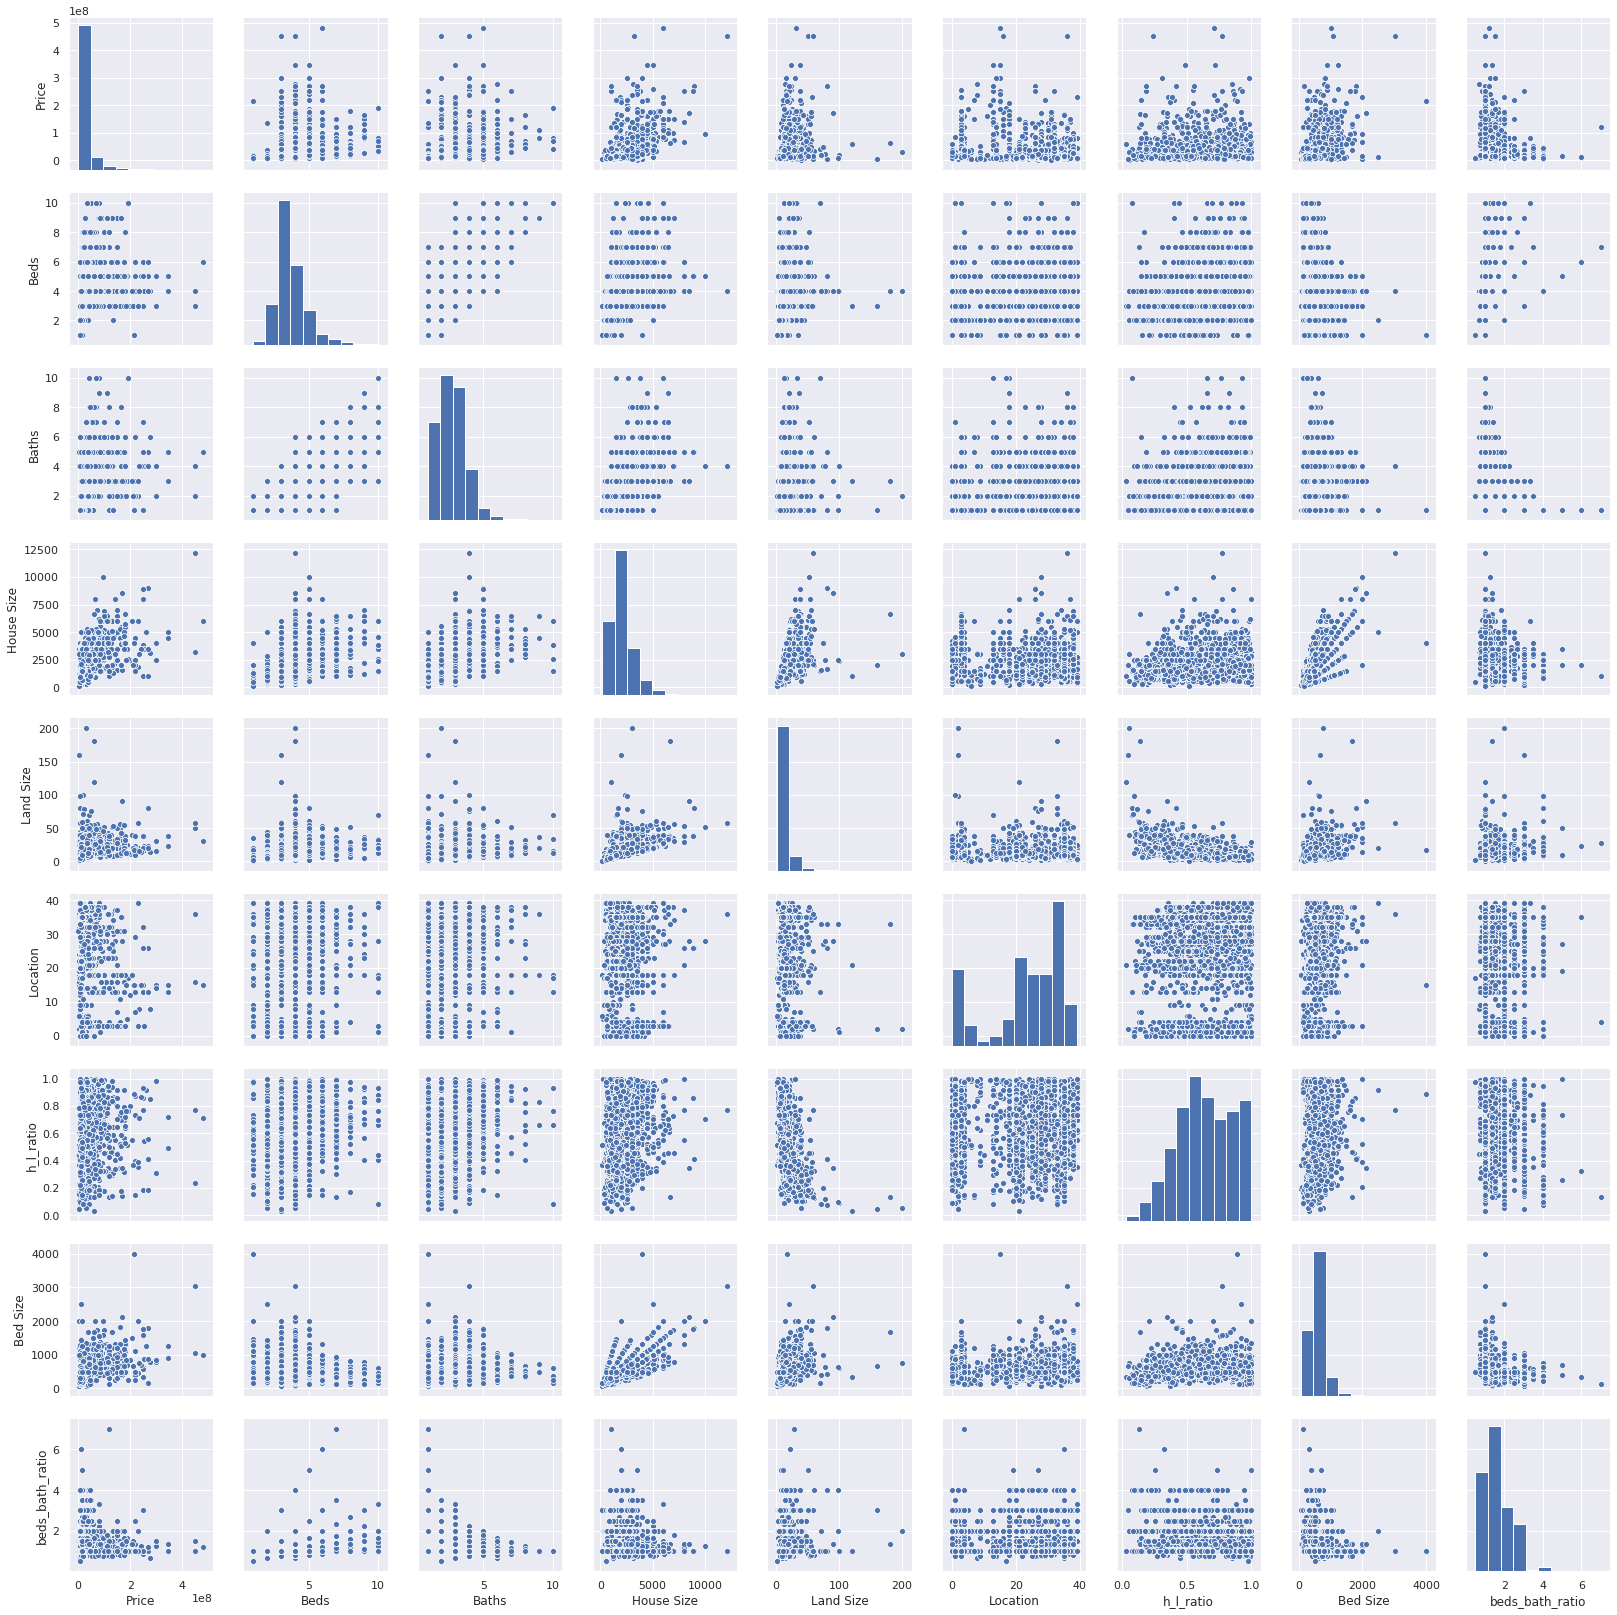

In [62]:
sns.set()

cols = ['Price', 'Beds', 'Baths', 'House Size', 'Land Size', 'Location', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio']
sns.pairplot(df_single_story[cols], size = 2.5)


<h1>Clustering single story houses with House size and price

In [63]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

df_house_size_price = pd.concat([df_single_story['House Size'],df_single_story['Price']], axis=1)
km.fit(df_house_size_price)
y_km = km.predict(df_house_size_price)

Text(0.5, 1.0, 'Clustering of Data set based on House Size and Price')

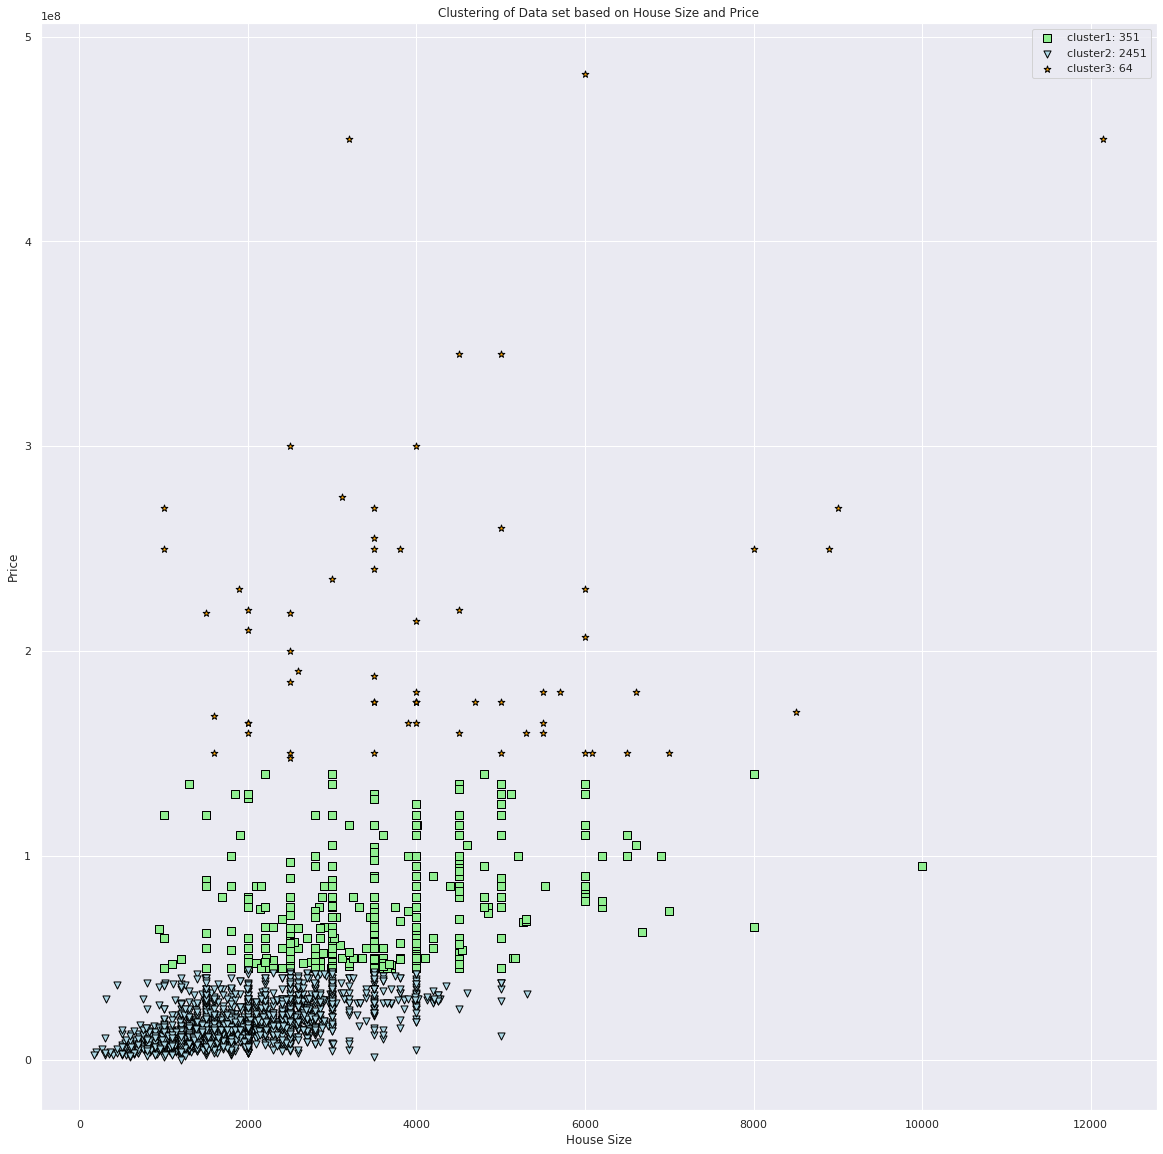

In [64]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_house_size_price[y_km == 0]['House Size'],
    df_house_size_price[y_km == 0]['Price'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_house_size_price[y_km == 1]['House Size'],
    df_house_size_price[y_km == 1]['Price'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_house_size_price[y_km == 2]['House Size'],
    df_house_size_price[y_km == 2]['Price'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str(df_house_size_price[y_km==0].shape[0]),
    'cluster2: ' + str(df_house_size_price[y_km==1].shape[0]),
    'cluster3: ' + str(df_house_size_price[y_km==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('Price')
ax.set_title('Clustering of Data set based on House Size and Price')

In [65]:
df_single_story[y_km==1].to_csv('single_story_cleaned_1.csv')

[(0.20683030390666313, 240, 23929829.25910744), (0.5983255168590061, 120, 6007785.043386223), (0.031896103160649614, 30, 71897511.60911965)]


Text(0.5, 1.0, 'Testing Model')

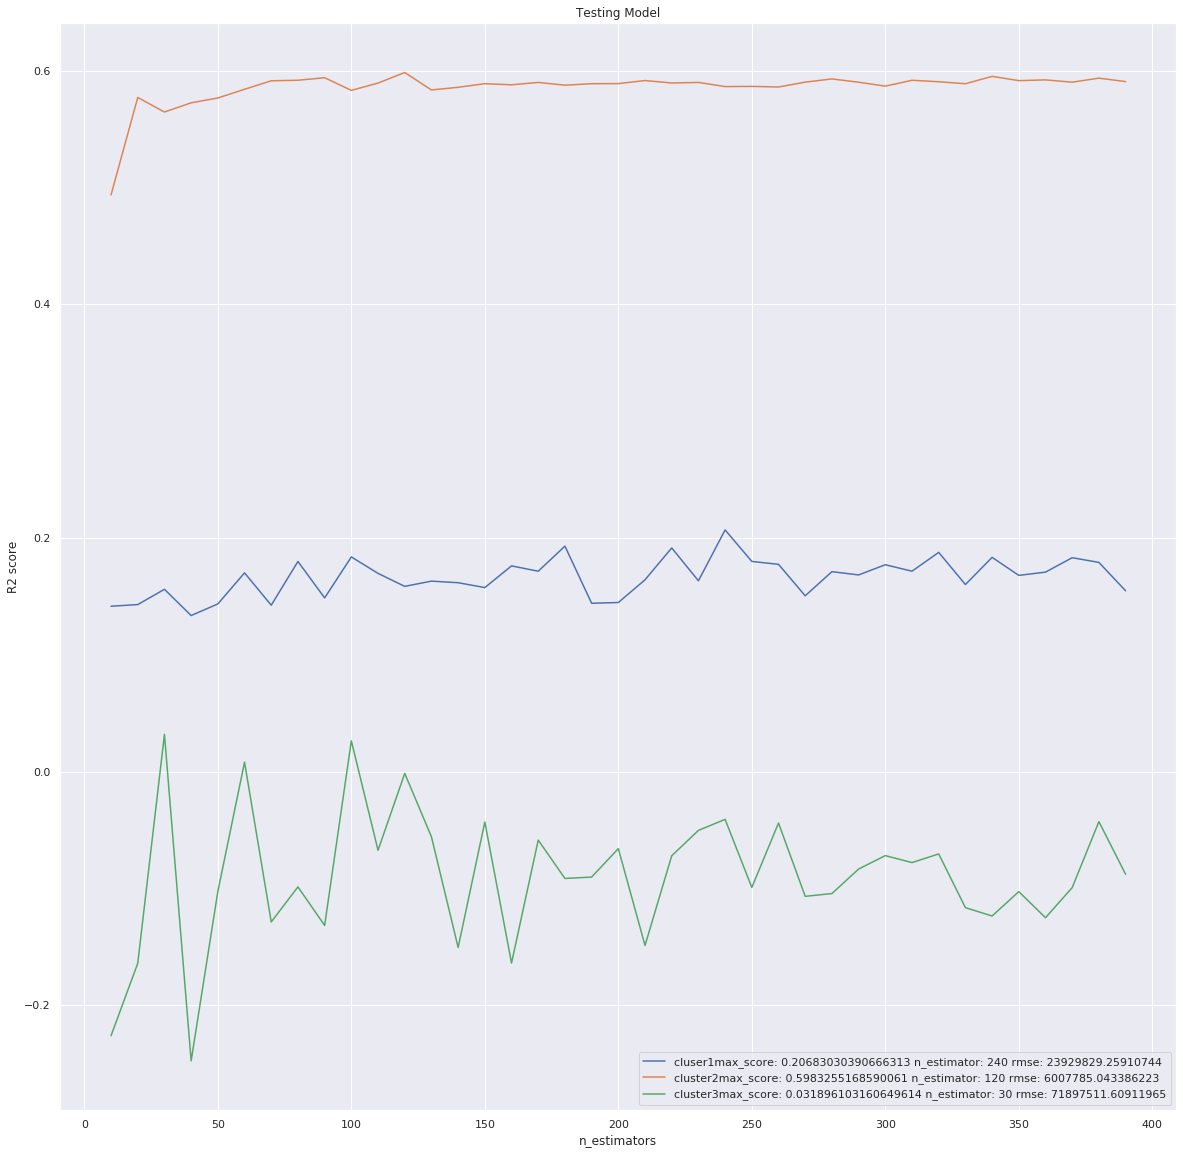

In [66]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df_single_story['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
print(max_scores_param)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2]),
    'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h1>Interesting to notice here, this model got least RMSE 60 lakhs so far for cluster 2


<h1>try with 2 cluster

In [68]:
km = KMeans(
    n_clusters=2,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

df_house_size_price = pd.concat([df_single_story['House Size'],df_single_story['Price']], axis=1)
km.fit(df_house_size_price)
y_km = km.predict(df_house_size_price)

In [69]:
df_single_story[y_km == 1].to_csv('single_story_cleaned_2.csv')

Text(0.5, 1.0, 'Clustering of Data set based on House Size and Price')

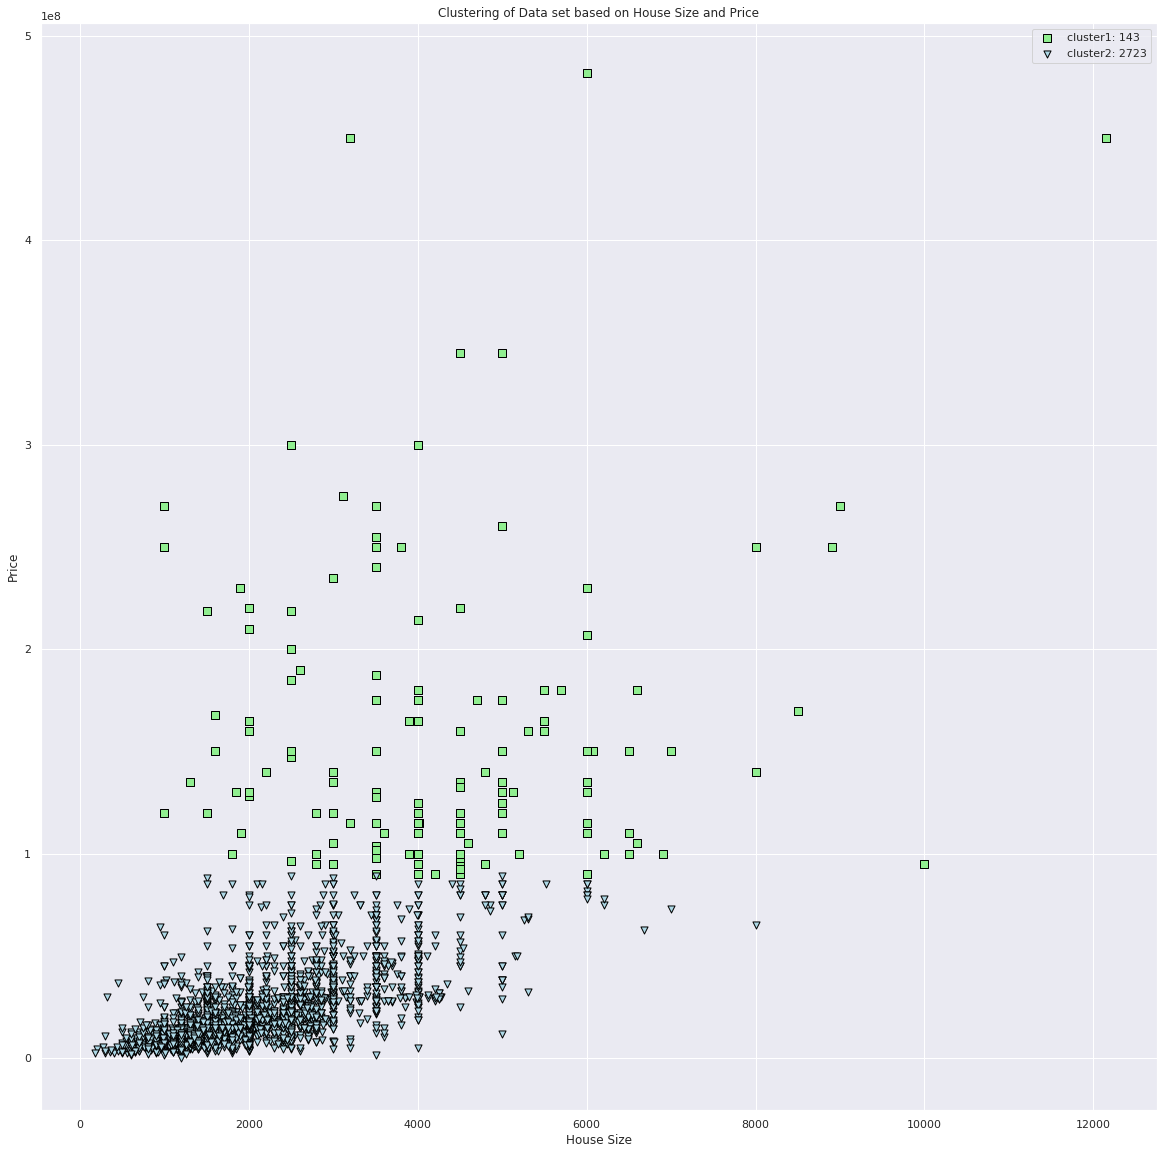

In [70]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df_house_size_price[y_km == 0]['House Size'],
    df_house_size_price[y_km == 0]['Price'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df_house_size_price[y_km == 1]['House Size'],
    df_house_size_price[y_km == 1]['Price'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

# ax.scatter(
#     df_house_size_price[y_km == 2]['House Size'],
#     df_house_size_price[y_km == 2]['Price'],
#     s=50,
#     c='orange',
#     marker='*',
#     edgecolor='black',
#     label='cluster 1'
# )
ax.legend([
    'cluster1: ' + str(df_house_size_price[y_km==0].shape[0]),
    'cluster2: ' + str(df_house_size_price[y_km==1].shape[0])
#     'cluster3: ' + str(df_house_size_price[y_km==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('Price')
ax.set_title('Clustering of Data set based on House Size and Price')

[(0.14321081187987428, 30, 76542216.98411521), (0.6741467722368153, 150, 9429796.275174132)]


Text(0.5, 1.0, 'Testing Model')

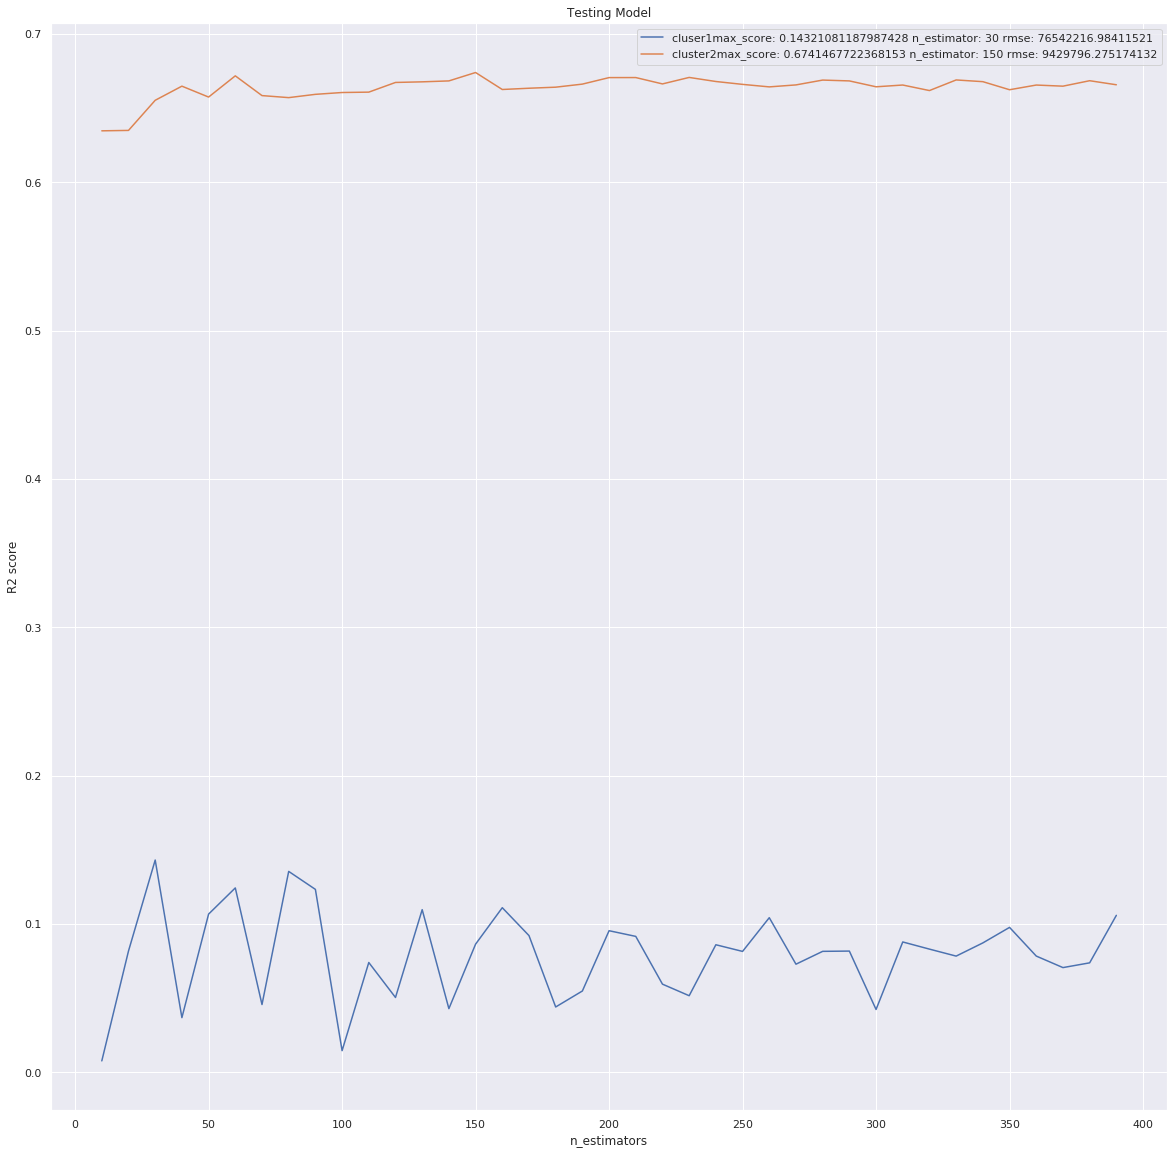

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
for index in range(2):
    X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == index],
    df_single_story['Price'][y_km == index],
    test_size=0.25,
    random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    ax.plot(estimators, scores)
print(max_scores_param)
ax.legend([
    'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
    'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
#     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
#     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model')

<h1>With 2 clusters, The big cluster score high, but RMSE is also high

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
df_single_story = pd.read_csv('single_story_cleaned_1.csv')

In [74]:
df_single_story = df_single_story.drop(['Unnamed: 0'], axis=1)
df_single_story.head()

,Unnamed: 0.1,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
0,0,35,12500000,4,2,1750.0,6.5,0.988910,437.500000,2.000000
1,3,25,35000000,7,4,1700.0,15.0,0.416284,242.857143,1.750000
2,8,25,8900000,3,2,1380.0,6.0,0.844812,460.000000,1.500000
3,11,20,23000000,5,3,3500.0,20.0,0.642792,700.000000,1.666667
4,12,22,13000000,3,2,1800.0,10.0,0.661157,600.000000,1.500000


In [75]:
def search_best_model(pipe, params, X, Y):
    grid_obj = GridSearchCV(estimator= pipe,
                            param_grid = params,
                            cv =3,
                            verbose = 2,
                            n_jobs =1,
                            refit=True,
                            error_score='raise'
                            )
    X_train, X_test, Y_train, Y_test = train_test_split(
        X,
        Y,
        test_size=0.25,
        random_state=42
    )
    grid_obj.fit(X_train, Y_train)
    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)
    print("#### Results")
    print(results_sorted)
    print(grid_obj)
    print("best index", grid_obj.best_index_)
    print("best score", grid_obj.best_score_)
    print("best params", grid_obj.best_params_)
    estimator = grid_obj.best_estimator_
    cv_scores = cross_val_score(estimator, X, Y.values.ravel(), cv=shuffle, scoring='r2')
    print("#### CV Results")
    print("mean score", cv_scores.mean())
    estimator.fit(X_train,y_train)
    y_p = estimator.predict(X_test)
    rmse = np.sqrt(((y_p - Y_test) ** 2).mean()) 
    
    print(r2_score(y_p, y_test))
    plt.scatter(y_p, y_test)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    plt.title('Predicted prices (LKR) vs. True prices (LKR) (Test-Train Split) cv_r2: ' + str(cv_scores.mean()) + " rmse: " + str(rmse))
    plt.show()

In [76]:
rf_params = [ {'clf__n_estimators': [10, 20, 50, 70, 100, 120, 130,140, 150, 200],
                'clf__max_features': [None, 1, 2,3, 4, 5, 6, 7, 8],
                'clf__max_depth': [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45]}
            ]
pipe_rf = Pipeline([('clf', RandomForestRegressor())])



In [77]:
df_single_story.describe()


,Unnamed: 0.1,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
count,2451.000000,2451.000000,2.451000e+03,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,3644.897593,23.793554,1.618630e+07,3.367197,2.253774,1825.490865,11.755557,0.637313,553.712335,1.701718
std,2211.799735,11.692341,9.174206e+06,1.103893,0.993479,753.301405,8.601083,0.212290,189.412026,0.709987
min,0.000000,0.000000,8.500000e+04,1.000000,1.000000,174.240000,1.000000,0.045914,66.666667,0.500000
25%,1733.500000,20.000000,9.000000e+06,3.000000,1.000000,1300.000000,8.000000,0.489746,433.333333,1.000000
50%,3574.000000,27.000000,1.400000e+07,3.000000,2.000000,1633.000000,10.000000,0.636670,516.666667,1.500000
75%,5519.500000,35.000000,2.100000e+07,4.000000,3.000000,2300.000000,13.000000,0.816243,650.000000,2.000000
max,7609.000000,39.000000,4.420000e+07,10.000000,10.000000,5306.000000,200.000000,0.999998,2500.000000,6.000000


<h1>Price vs Bed Size

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


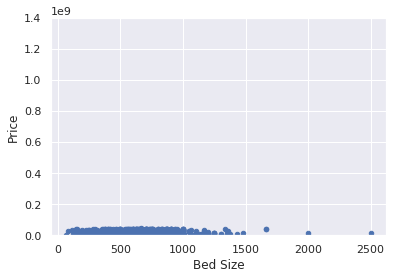

In [78]:
var = 'Bed Size'
data = pd.concat([df_single_story['Price'], df_single_story[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

<h1>Building Models without House Size and Beds

[(0.5724912883240705, 230, 6186135.861970277)]


Text(0.5, 1.0, 'Testing Modelmax_score: 0.5724912883240705 n_estimator: 230 rmse: 6186135.861970277')

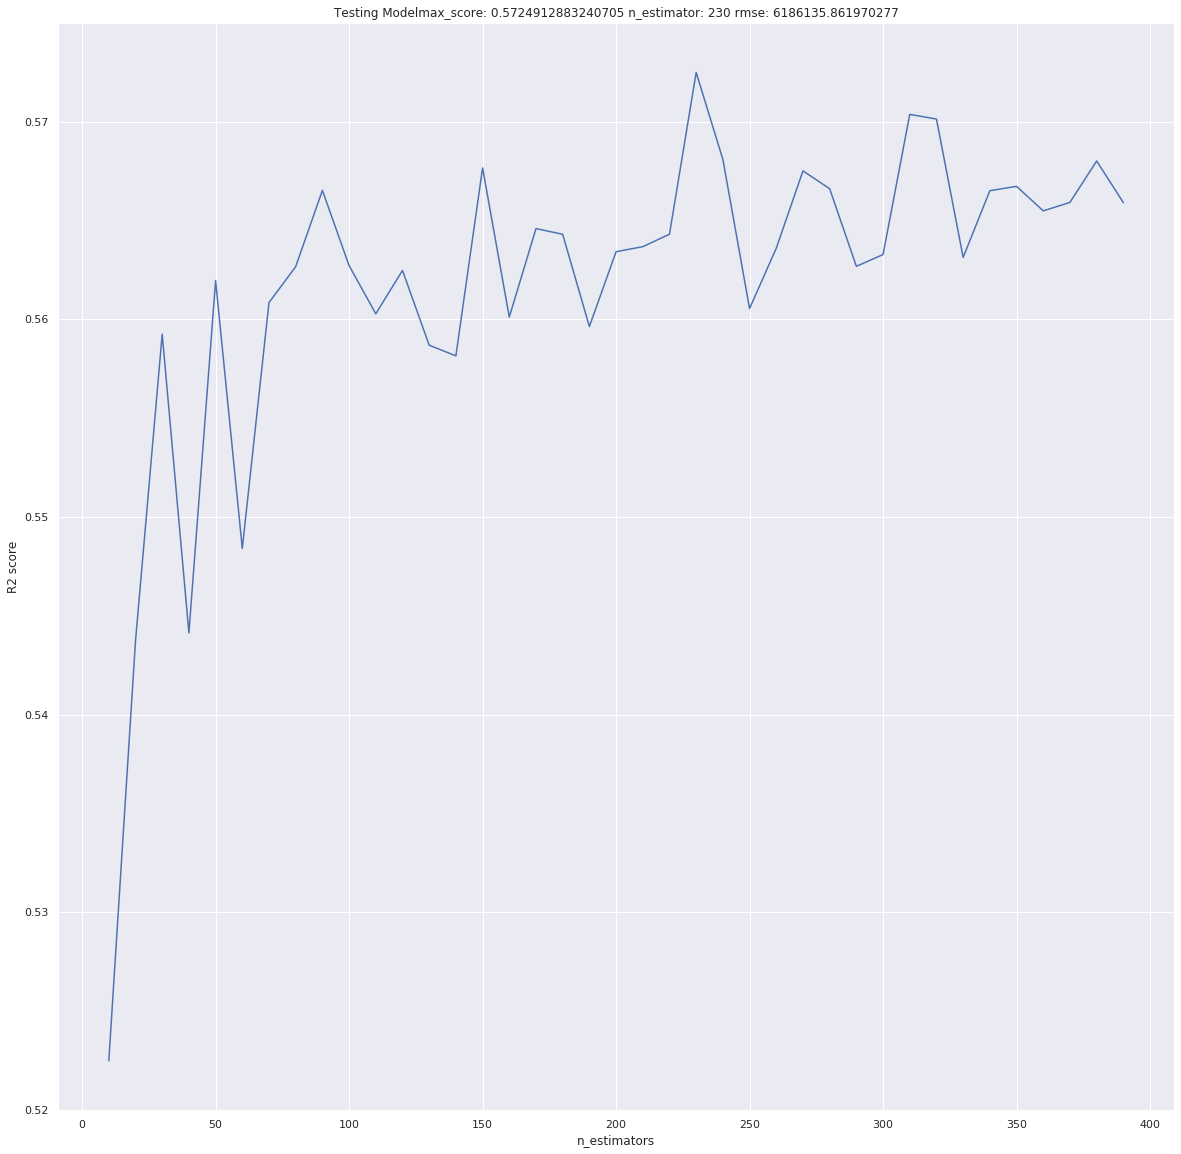

In [79]:
fig, ax = plt.subplots(figsize=(20, 20))
model = RandomForestRegressor(n_jobs=-1)
max_scores_param = []
X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(columns=[ 'Price', 'House Size', 'Beds'],axis=1),
    df_single_story['Price'],
    test_size=0.25,
    random_state=42
    )
estimators = np.arange(10, 400, 10)
scores = []
rmse = 0.0
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
    scores.append(model.score(X_test, Y_test))
max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
ax.plot(estimators, scores)
print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 score')
ax.set_title('Testing Model' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]))

In [80]:
import itertools



In [81]:
features = df_single_story.drop(['Price', 'Unnamed: 0.1'], axis=1).columns
features_combinations = []
for l in range(1, len(features)+1):
    for feat_comb in itertools.combinations(features, l):
        features_combinations.append(list(feat_comb))

<h1> Build models with all possilbe combinations of features and n_estimators  to find out best 

#######################################################################################################################
['Location']
[(0.27168560686944987, 20, 8026661.683235812)]
#######################################################################################################################
#######################################################################################################################
['Beds']
[(0.3023094227699543, 140, 7849998.689974414)]
#######################################################################################################################
#######################################################################################################################
['Baths']
[(0.30088354898556036, 20, 7853913.883194124)]
#######################################################################################################################
###########################################################################################################

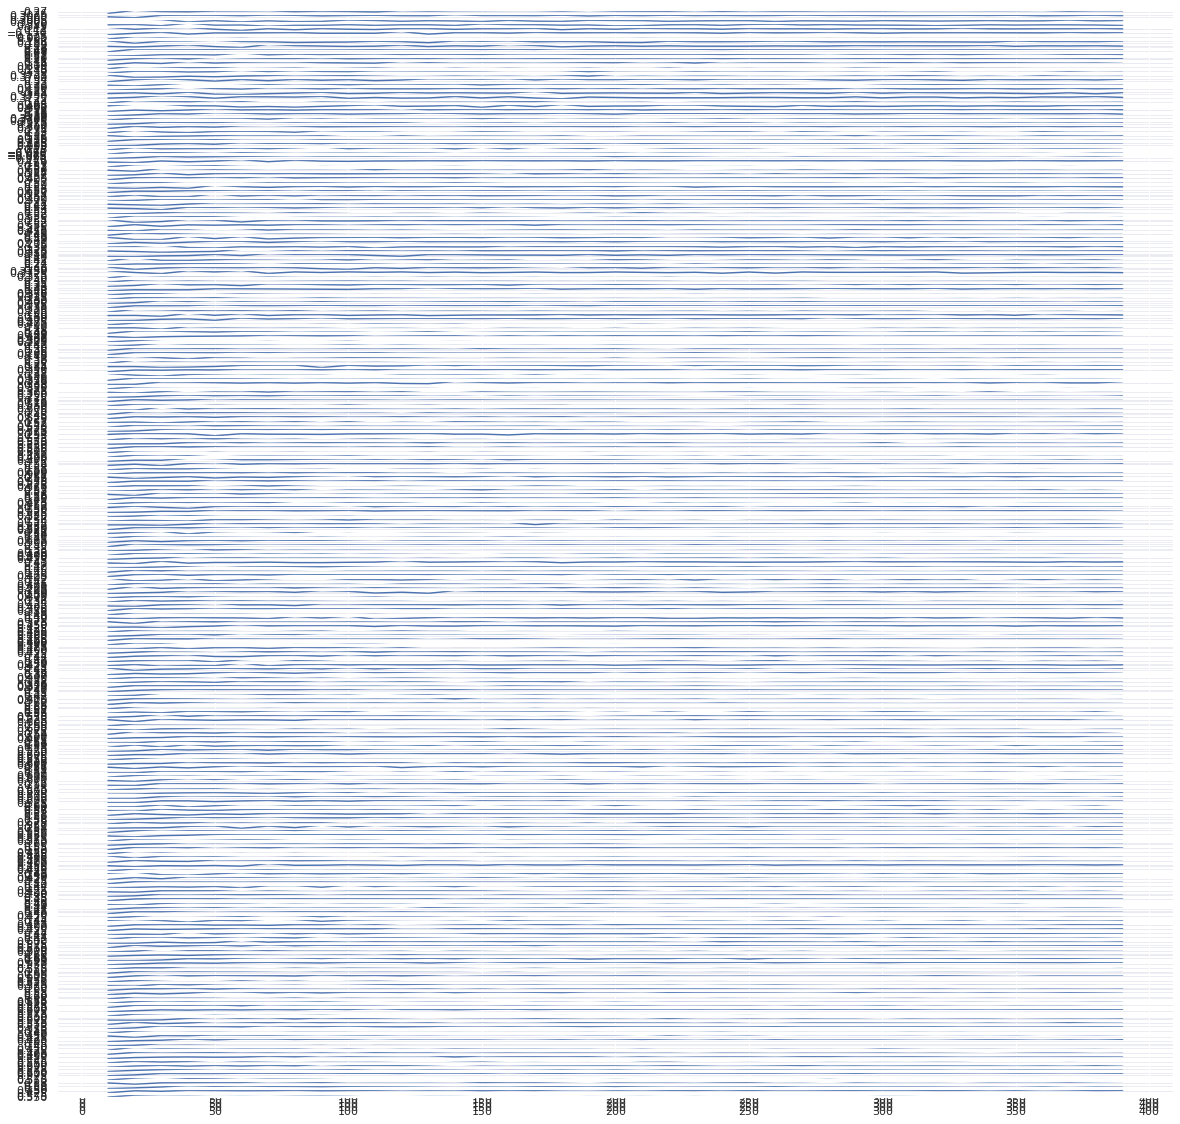

In [82]:
fig, axes = plt.subplots(len(features_combinations), figsize=(20, 20))
rf_results = []
for index, features in enumerate(features_combinations):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_single_story[features],
        df_single_story['Price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
    axes[index].plot(estimators, scores)
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
    print('#######################################################################################################################')
    print(features)
    print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')
#     axes[index].set_xlabel('n_estimators')
#     axes[index].set_ylabel('R2 score')
#     axes[index].set_title('Testing Model' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]))

In [83]:
df_single_story['Price'].describe()

count    2.451000e+03
mean     1.618630e+07
std      9.174206e+06
min      8.500000e+04
25%      9.000000e+06
50%      1.400000e+07
75%      2.100000e+07
max      4.420000e+07
Name: Price, dtype: float64

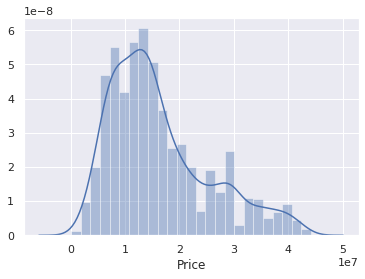

In [84]:
sns.distplot(df_single_story['Price'])

<h1>Drop the house which has price of 85000</h1>


In [86]:
df_single_story = df_single_story.drop(df_single_story[df_single_story['Price'] == 85000].index, axis=0)

In [87]:
df_single_story['Price'].describe()

count    2.450000e+03
mean     1.619287e+07
std      9.170306e+06
min      1.500000e+06
25%      9.050000e+06
50%      1.400000e+07
75%      2.100000e+07
max      4.420000e+07
Name: Price, dtype: float64

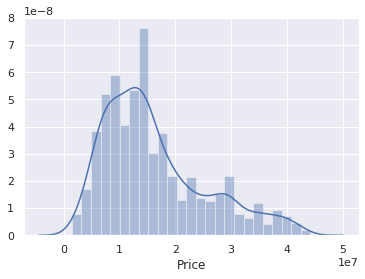

In [88]:
sns.distplot(df_single_story['Price'])

In [89]:
df_single_story.to_csv('single_story_cleaned_3.csv')

In [90]:
df_single_story[df_single_story['Price'] < 8.5e6][df_single_story['House Size'] < 500]

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0.1,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
261,745,18,4300000,3,1,200.00,2.00,0.367309,66.666667,3.0
714,2013,9,3500000,1,1,400.00,1.50,0.979492,400.000000,1.0
888,2448,5,5500000,2,1,272.00,1.00,0.999082,136.000000,2.0
1165,3349,39,2500000,1,1,400.00,2.00,0.734619,400.000000,1.0
1287,3774,28,3000000,1,1,350.00,2.50,0.514233,350.000000,1.0
1501,4418,9,2400000,2,1,300.00,2.75,0.400701,150.000000,2.0
1970,5991,36,3600000,2,1,450.00,4.00,0.413223,225.000000,2.0
1978,6014,25,5500000,2,2,442.00,10.00,0.162351,221.000000,1.0
2023,6161,17,4200000,2,2,366.00,2.00,0.672176,183.000000,1.0
2248,7001,21,3600000,1,1,300.00,7.10,0.155201,300.000000,1.0


<h1>Open newly created data set </h1>

In [91]:
df_single_story = pd.read_csv('./single_story_cleaned_3.csv')

In [92]:
df_single_story.head()

,Unnamed: 0,Unnamed: 0.1,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
0,0,0,35,12500000,4,2,1750.0,6.5,0.988910,437.500000,2.000000
1,1,3,25,35000000,7,4,1700.0,15.0,0.416284,242.857143,1.750000
2,2,8,25,8900000,3,2,1380.0,6.0,0.844812,460.000000,1.500000
3,3,11,20,23000000,5,3,3500.0,20.0,0.642792,700.000000,1.666667
4,4,12,22,13000000,3,2,1800.0,10.0,0.661157,600.000000,1.500000


In [93]:
df_single_story = df_single_story.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [94]:
df_single_story.describe()

,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
count,2450.000000,2.450000e+03,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,23.790612,1.619287e+07,3.367347,2.253878,1825.746167,11.756273,0.637394,553.775075,1.701801
std,11.693821,9.170306e+06,1.104094,0.993669,753.349122,8.602765,0.212296,189.425218,0.710120
min,0.000000,1.500000e+06,1.000000,1.000000,174.240000,1.000000,0.045914,66.666667,0.500000
25%,20.000000,9.050000e+06,3.000000,1.000000,1300.000000,8.000000,0.489746,433.333333,1.000000
50%,27.000000,1.400000e+07,3.000000,2.000000,1633.000000,10.000000,0.636670,516.666667,1.500000
75%,35.000000,2.100000e+07,4.000000,3.000000,2300.000000,13.000000,0.816243,650.000000,2.000000
max,39.000000,4.420000e+07,10.000000,10.000000,5306.000000,200.000000,0.999998,2500.000000,6.000000


<h1>Important Features

In [95]:
features_important =[
    ['Location', 'Beds', 'Baths', 'Land Size'],
    ['Location', 'Beds', 'Baths','House Size', 'h_l_ratio'],
    ['Location', 'Beds', 'Baths', 'Land Size', 'h_l_ratio'],
    ['Location', 'Beds', 'Baths', 'Land Size', 'Bed Size'],
    ['Location', 'Beds', 'House Size', 'Land Size', 'beds_bath_ratio'],
    ['Location', 'Beds', 'House Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Land Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Baths', 'Land Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio']  
]

<h1>Try MLP with important features </h1>

In [96]:
def search_best_MLP_model(df):
    results = []
#     X_train, X_test, Y_train, Y_test = train_test_split(
#         X,
#         Y,
#         test_size=0.25,
#         random_state=42
#     )
    hidden_layers = [
        (100, 10,),
        (100, 10, 100,),
        (100, 200, 100,),
        (100,),
        (200, 100,),
        (7,),
        (7, 7,),
        (7, 7, 7),
        (20, 20, 20,),
        (20, 50,),
        (50,),
        (50, 50,),
        (50, 20, 50,),
        (50, 50, 50,),
        (400, 50, 10),
        (400, 200, 100),
        (350, 50, 200)
    ]
    activations = ['identity', 'logistic', 'tanh', 'relu']
    solvers = ['lbfgs', 'sgd', 'adam']
    learning_rates = ['constant', 'invscaling', 'adaptive']
    #iterate over layers
    for layers in hidden_layers:
        for act in activations:
            for solver in solvers:
                for lr in learning_rates:
                    for features in features_important:
                        X_train, X_test, Y_train, Y_test = train_test_split(
                            df[features],
                            df['Price'],
                            test_size=0.25,
                            random_state=42)
                        model = MLPRegressor(
                        hidden_layer_sizes= layers, 
                        activation=act, 
                        solver=solver, 
                        alpha=0.0001, 
                        batch_size=32, 
                        learning_rate=lr, 
                        learning_rate_init=0.001, 
                        power_t=0.5, 
                        momentum=0.9, 
                        verbose=1, 
                        early_stopping=True)
                        model.fit(X_train, Y_train)
                        score = model.score(X_train, Y_train)
                        #X_train[features], Y_test
                        y_p = model.predict(X_test)
                        rmse = np.sqrt(((y_p - Y_test) ** 2).mean())
                        result = [score, rmse, layers, act, solver, lr, features]
                        results.append(result)
                        print('#############################################################################')
                        print(result)
                        print('#############################################################################')
    return results                    
    

In [97]:
df_single_story.columns

Index(['Location', 'Price', 'Beds', 'Baths', 'House Size', 'Land Size',
       'h_l_ratio', 'Bed Size', 'beds_bath_ratio'],
      dtype='object')

In [98]:
df_single_story_scaled = df_single_story.copy()
min_max_scaler = MinMaxScaler()
df_single_story_scaled[df_single_story.columns] =  min_max_scaler.fit_transform(df_single_story[df_single_story.columns])

In [ ]:
df_single_story_scaled.head()

In [ ]:
results = search_best_MLP_model(df_single_story_scaled)

In [106]:
df_single_story.describe()

,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
count,2450.000000,2.450000e+03,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,23.790612,1.619287e+07,3.367347,2.253878,1825.746167,11.756273,0.637394,553.775075,1.701801
std,11.693821,9.170306e+06,1.104094,0.993669,753.349122,8.602765,0.212296,189.425218,0.710120
min,0.000000,1.500000e+06,1.000000,1.000000,174.240000,1.000000,0.045914,66.666667,0.500000
25%,20.000000,9.050000e+06,3.000000,1.000000,1300.000000,8.000000,0.489746,433.333333,1.000000
50%,27.000000,1.400000e+07,3.000000,2.000000,1633.000000,10.000000,0.636670,516.666667,1.500000
75%,35.000000,2.100000e+07,4.000000,3.000000,2300.000000,13.000000,0.816243,650.000000,2.000000
max,39.000000,4.420000e+07,10.000000,10.000000,5306.000000,200.000000,0.999998,2500.000000,6.000000


In [109]:
min_max_scaler.inverse_transform([[0.14963817646287808,1, 0 , 0, 0, 0, 0, 0, 0]])[0][1]

44200000.0

In [114]:
from functools import cmp_to_key

In [112]:
transformed_results = [ (r2, min_max_scaler.inverse_transform([[0,rmse, 0 , 0, 0, 0, 0, 0, 0]])[0][1], layers, act, solver, lr, features)  for (r2, rmse, layers, act, solver, lr, features) in results]

In [117]:
sorted(transformed_results, key=lambda item: item[0], reverse=True)

[(0.6315028111968277,
  7652004.148810535,
  (100, 200, 100),
  'relu',
  'adam',
  'invscaling',
  ['Location', 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio']),
 (0.627348972580182,
  7774957.505674273,
  (100, 200, 100),
  'relu',
  'adam',
  'invscaling',
  ['Location', 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'beds_bath_ratio']),
 (0.6024937078510706,
  7559644.558986738,
  (100, 200, 100),
  'relu',
  'adam',
  'adaptive',
  ['Location', 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'beds_bath_ratio']),
 (0.6011648979524571,
  7884924.234079648,
  (400, 200, 100),
  'relu',
  'lbfgs',
  'adaptive',
  ['Location', 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'beds_bath_ratio']),
 (0.6008132132702173,
  7616806.899142331,
  (400, 200, 100),
  'relu',
  'lbfgs',
  'adaptive',
  ['Location', 'Beds', 'Baths', 'House Size', 'h_l_ratio']),
 (0.599643165805012,
  7826856.049432814,
  (200, 100),
  'relu',
  'lbfgs',
  'constant',
  ['Location', 'Beds', 'Baths', 'House Size',